In [139]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.svm import SVR
import warnings


# Read the CSV file into a DataFrame
KcData = pd.read_csv('KC_housing_data.csv')

# Display the first few rows of the DataFrame
KcData.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [140]:
KcData.shape

(4600, 18)

In [141]:
#check the missing data values
KcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [142]:
KcData.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [280]:
(KcData["price"] > 25000000).sum()

1

/var/folders/mt/vslqx1qn1ygc6h862g97nbbr0000gn/T/ipykernel_5161/2009705080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KcData.corr(), annot=True)


<Axes: >

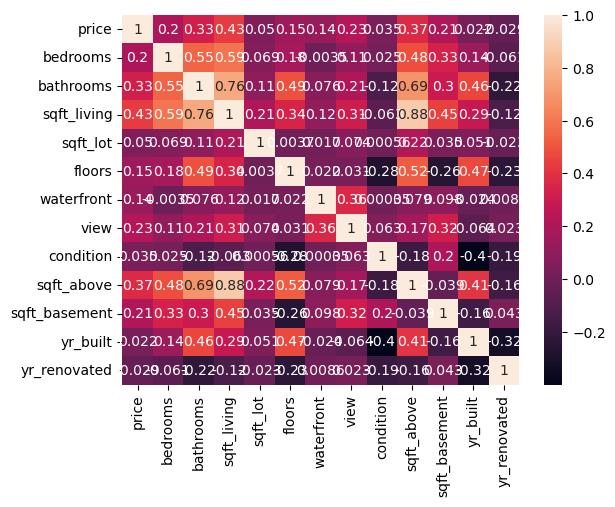

In [144]:
sns.heatmap(KcData.corr(), annot=True)

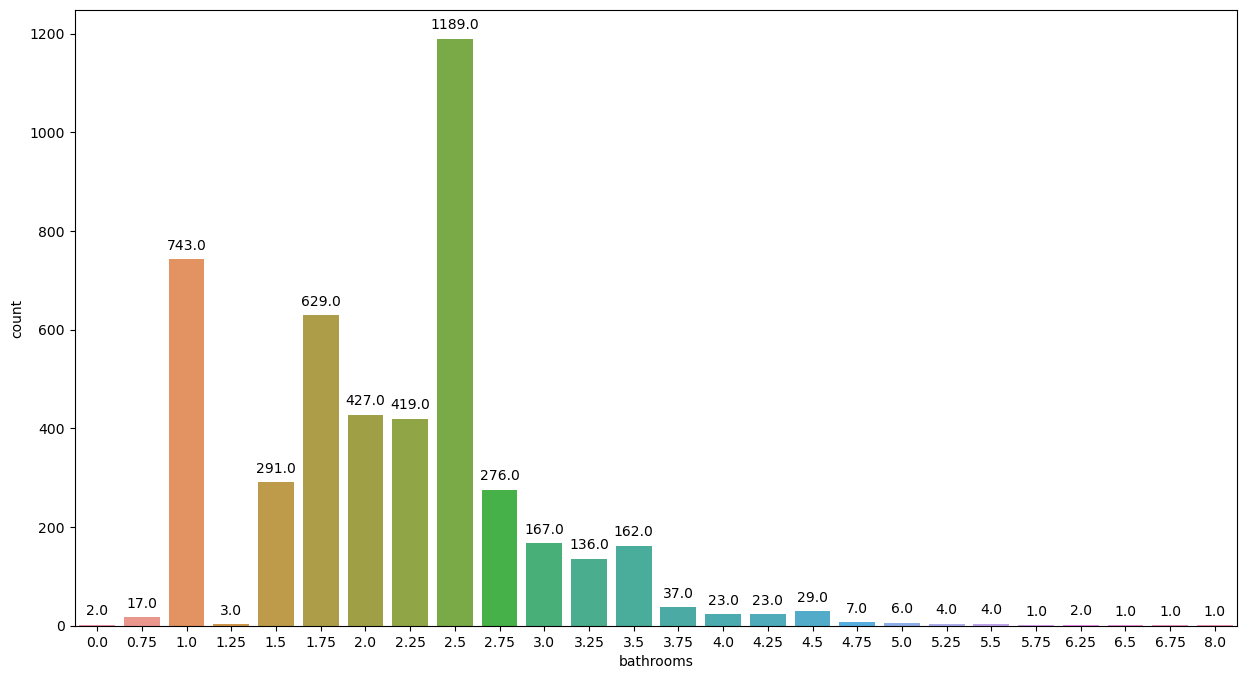

In [145]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="bathrooms", data=KcData)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



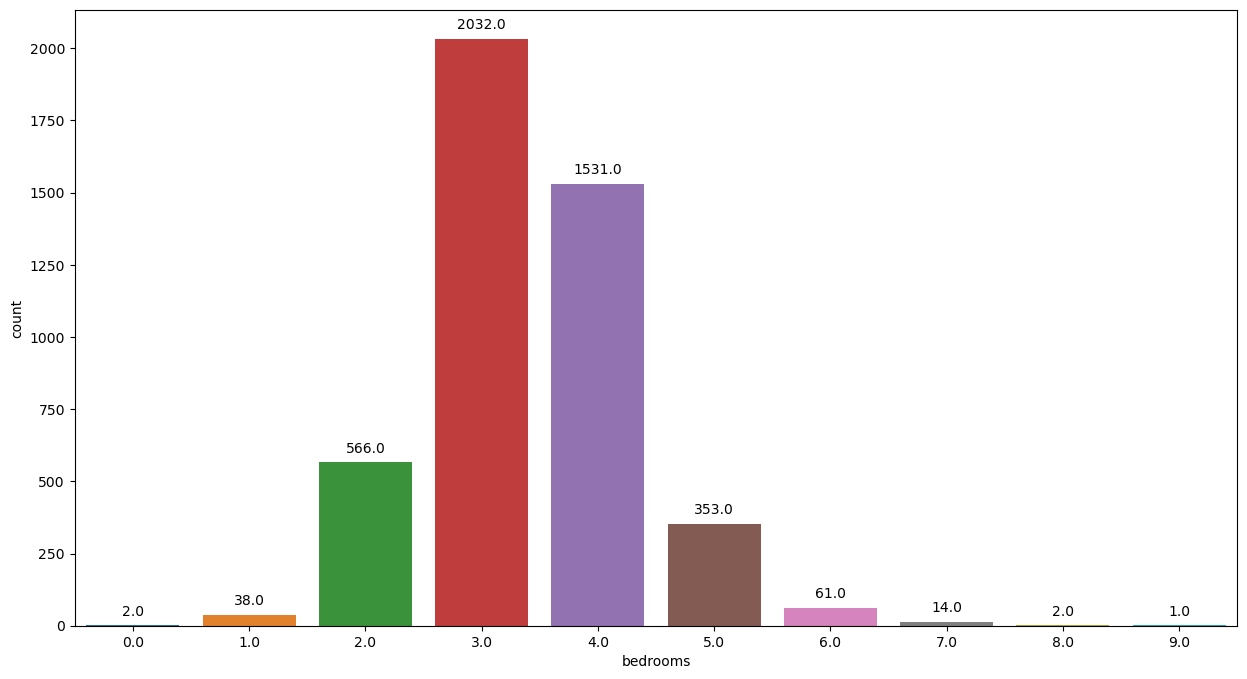

In [146]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="bedrooms", data=KcData)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


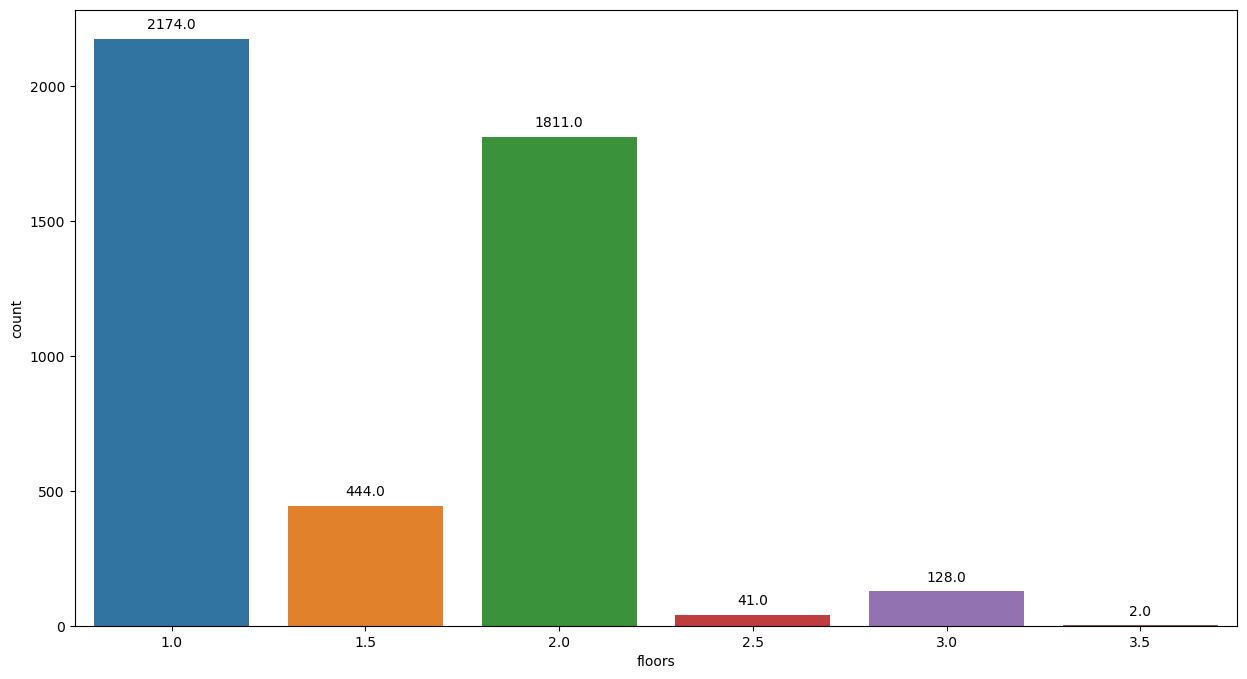

In [147]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="floors", data=KcData)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [148]:
KcData['floors']

0       1.5
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
4595    1.0
4596    2.0
4597    2.0
4598    1.0
4599    2.0
Name: floors, Length: 4600, dtype: float64

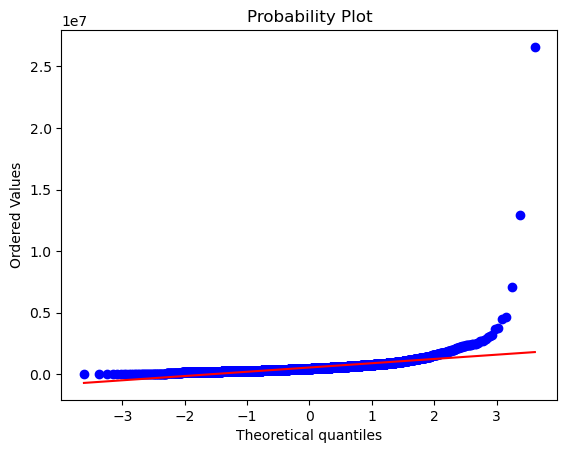

In [149]:
#The dataset without cleaned the outliers on the price variable
from scipy import stats
prob_log = stats.probplot(KcData["price"], plot=plt)
plt.show()

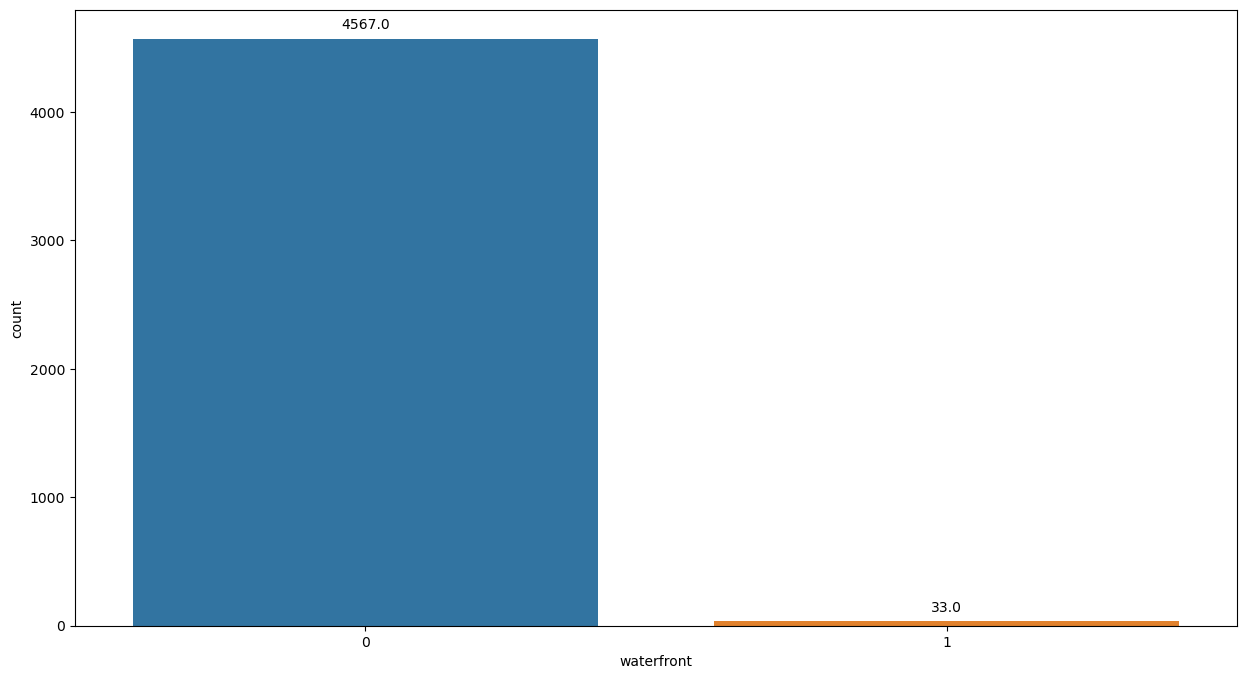

In [150]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="waterfront", data=KcData)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [151]:
KcData["waterfront"].sum()

33

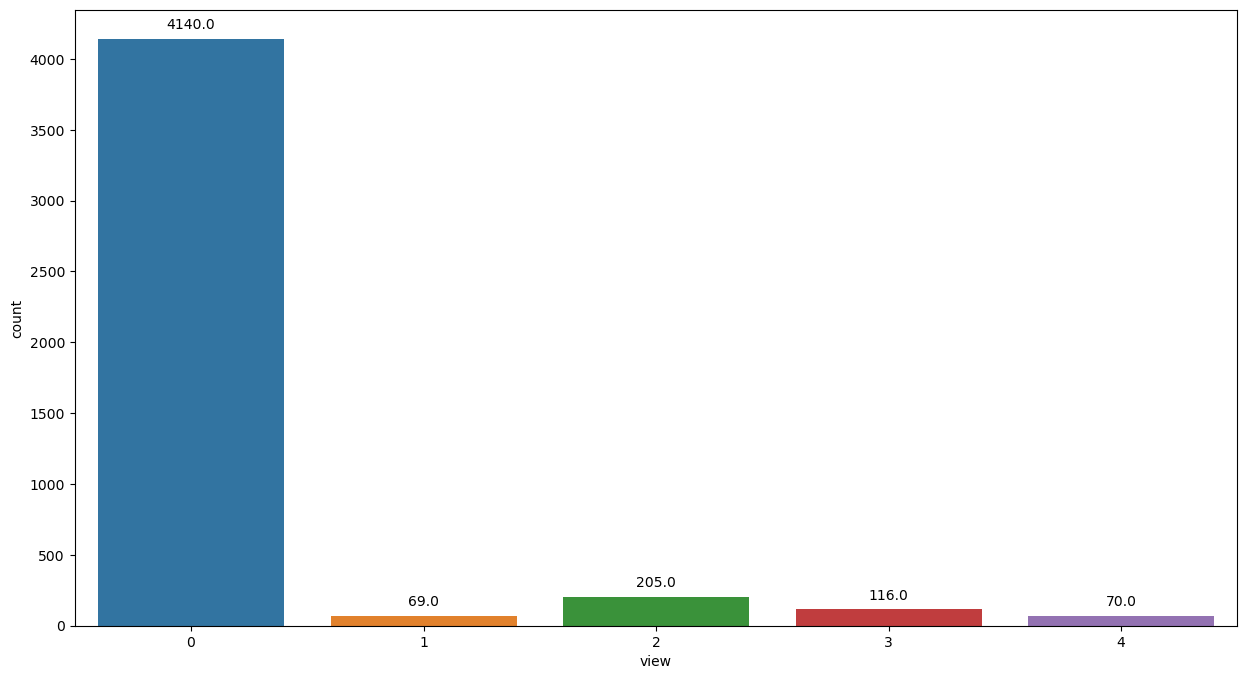

In [152]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="view", data=KcData)
# Add count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

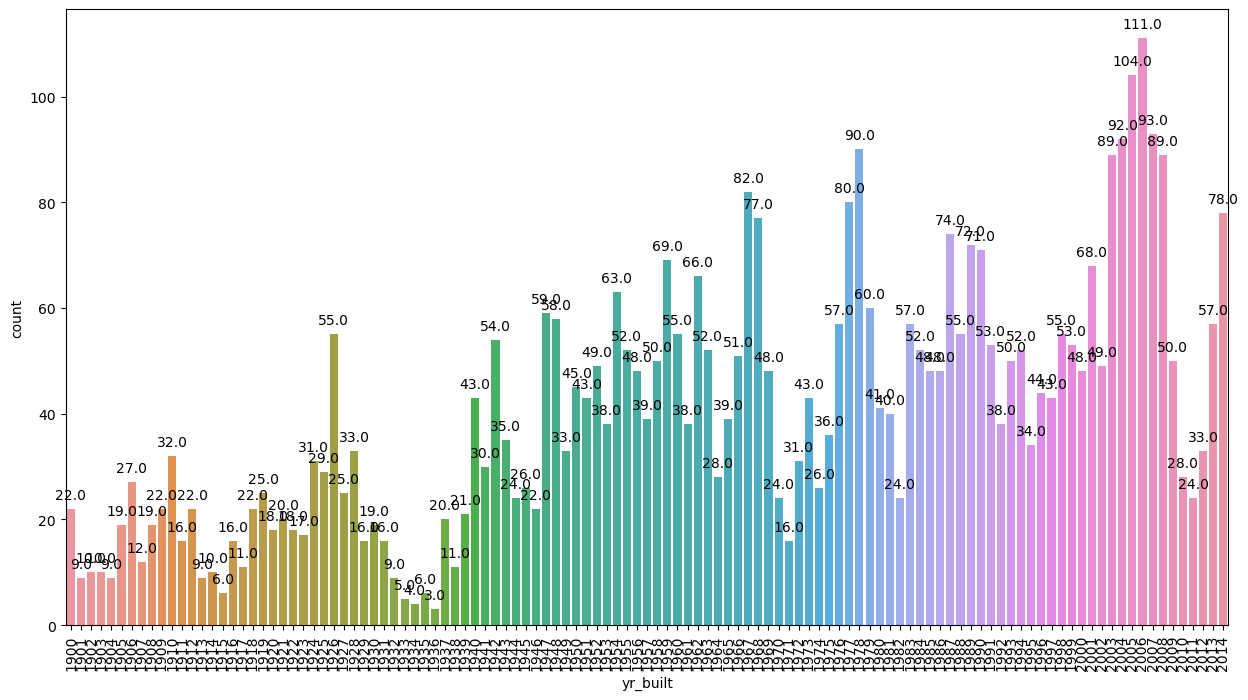

In [153]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='yr_built', data=KcData)
#label each bar count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

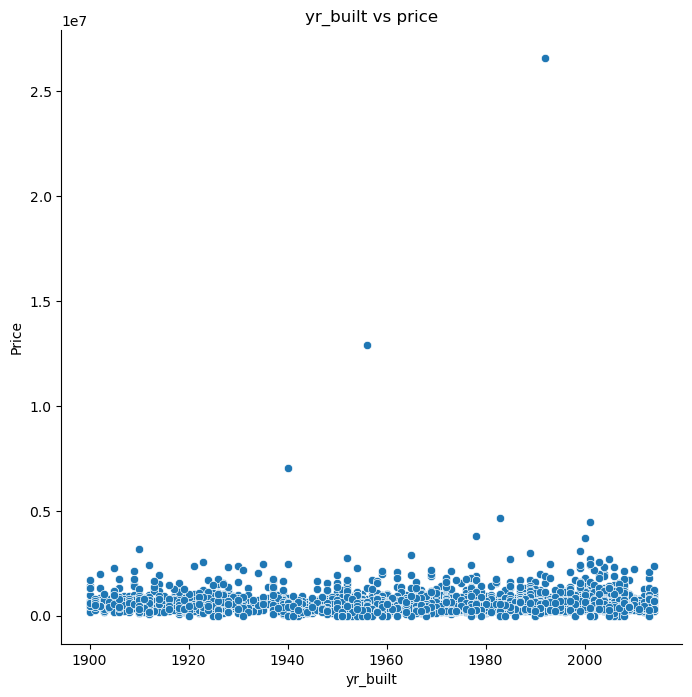

In [156]:
plt.figure(figsize = (12, 6))
sns.pairplot(KcData, x_vars = ['yr_built'], y_vars = ['price'], size = 7, kind = 'scatter')
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.title('yr_built vs price')
plt.show()

In [157]:
# ..... modify the droped values
#drop unnecesariy atrribuite on the dataset
# House_Data = KcData.drop(['date', 'street', 'statezip', 'sqft_above', 
#              'sqft_basement', 'country'], axis=1)
# House_Data
House_Data = KcData.drop(['date', 'street', 'statezip', 'country'], axis=1)
House_Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [158]:
#Before outliers cleaned
House_Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [159]:
# #After outliers cleaned
# data_without_outliers.describe()

In [160]:
#Conver the catgorical variable to numerical using python library 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
House_Data['city_encoded'] = label_encoder.fit_transform(House_Data['city'])
#After label coding the city attribute
House_Data[['city', 'city_encoded']].head(10)


,city,city_encoded
0,Shoreline,36
1,Seattle,35
2,Kent,18
3,Bellevue,3
4,Redmond,31
5,Seattle,35
6,Redmond,31
7,Maple Valley,21
8,North Bend,27
9,Seattle,35


In [161]:
#After label coding the city attribute
House_Data[['city', 'city_encoded']].head(10)


,city,city_encoded
0,Shoreline,36
1,Seattle,35
2,Kent,18
3,Bellevue,3
4,Redmond,31
5,Seattle,35
6,Redmond,31
7,Maple Valley,21
8,North Bend,27
9,Seattle,35


In [162]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  city_encoded   4600 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 539.2+ KB


In [163]:
#converting the string value into numerical values on the city attribute
# city_data = {'Seattle': 0, 'Renton': 1, 'Bellevue': 2, 'Redmond':3, 'Issaquah': 4, 
# 'Kirkland': 5, 'Kent': 6, 'Auburn':7, 'Sammamish': 8, 'Federal Way': 9,
# 'Shoreline': 10, 'Woodinville': 11, 'Maple Valley':12, 'Mercer Island':13,
# 'Burien':14,'Snoqualmie':15, 'Kenmore':16, 'Des Moines': 17, 'North Bend':18,
# 'Covington':19, 'Duvall':20, 'Lake Forest Park':21, 'Bothell':22, 'Newcastle':23,
# 'SeaTac':24, 'Tukwila':25,'Vashon':26,'Enumclaw':27,'Carnation':28,                
# 'Normandy Park':29, 'Clyde Hill':30, 'Medina':31,'Fall City':32,                
# 'Black Diamond':33, 'Ravensdale':34,'Pacific':35,'Algona':36,'Yarrow Point':37,
# 'Skykomish':38,'Preston':39,'Milton':40, 'Inglewood-Finn Hill':41,       
# 'Snoqualmie Pass':42,'Beaux Arts Village':43}

# House_Data['city'] = House_Data['city'].map(city_data)



In [164]:
House_Data.describe()[['price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'sqft_living',
                   'sqft_lot', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'floors', 'condition', 'city_encoded']]

,price,bedrooms,bathrooms,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,waterfront,view,floors,condition,city_encoded
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,1970.786304,808.608261,2139.346957,1.485252e+04,1827.265435,312.081522,0.007174,0.240652,1.512065,3.451739,25.674348
std,5.638347e+05,0.908848,0.783781,29.731848,979.414536,963.206916,3.588444e+04,862.168977,464.137228,0.084404,0.778405,0.538288,0.677230,11.982721
min,0.000000e+00,0.000000,0.000000,1900.000000,0.000000,370.000000,6.380000e+02,370.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1951.000000,0.000000,1460.000000,5.000750e+03,1190.000000,0.000000,0.000000,0.000000,1.000000,3.000000,17.000000
50%,4.609435e+05,3.000000,2.250000,1976.000000,0.000000,1980.000000,7.683000e+03,1590.000000,0.000000,0.000000,0.000000,1.500000,3.000000,32.000000
75%,6.549625e+05,4.000000,2.500000,1997.000000,1999.000000,2620.000000,1.100125e+04,2300.000000,610.000000,0.000000,0.000000,2.000000,4.000000,35.000000
max,2.659000e+07,9.000000,8.000000,2014.000000,2014.000000,13540.000000,1.074218e+06,9410.000000,4820.000000,1.000000,4.000000,3.500000,5.000000,43.000000


In [165]:
#count each city sold houses to make better understand 
city_counts = House_Data['city'].value_counts()
print(len(city_counts))


44


In [166]:
city_counts

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

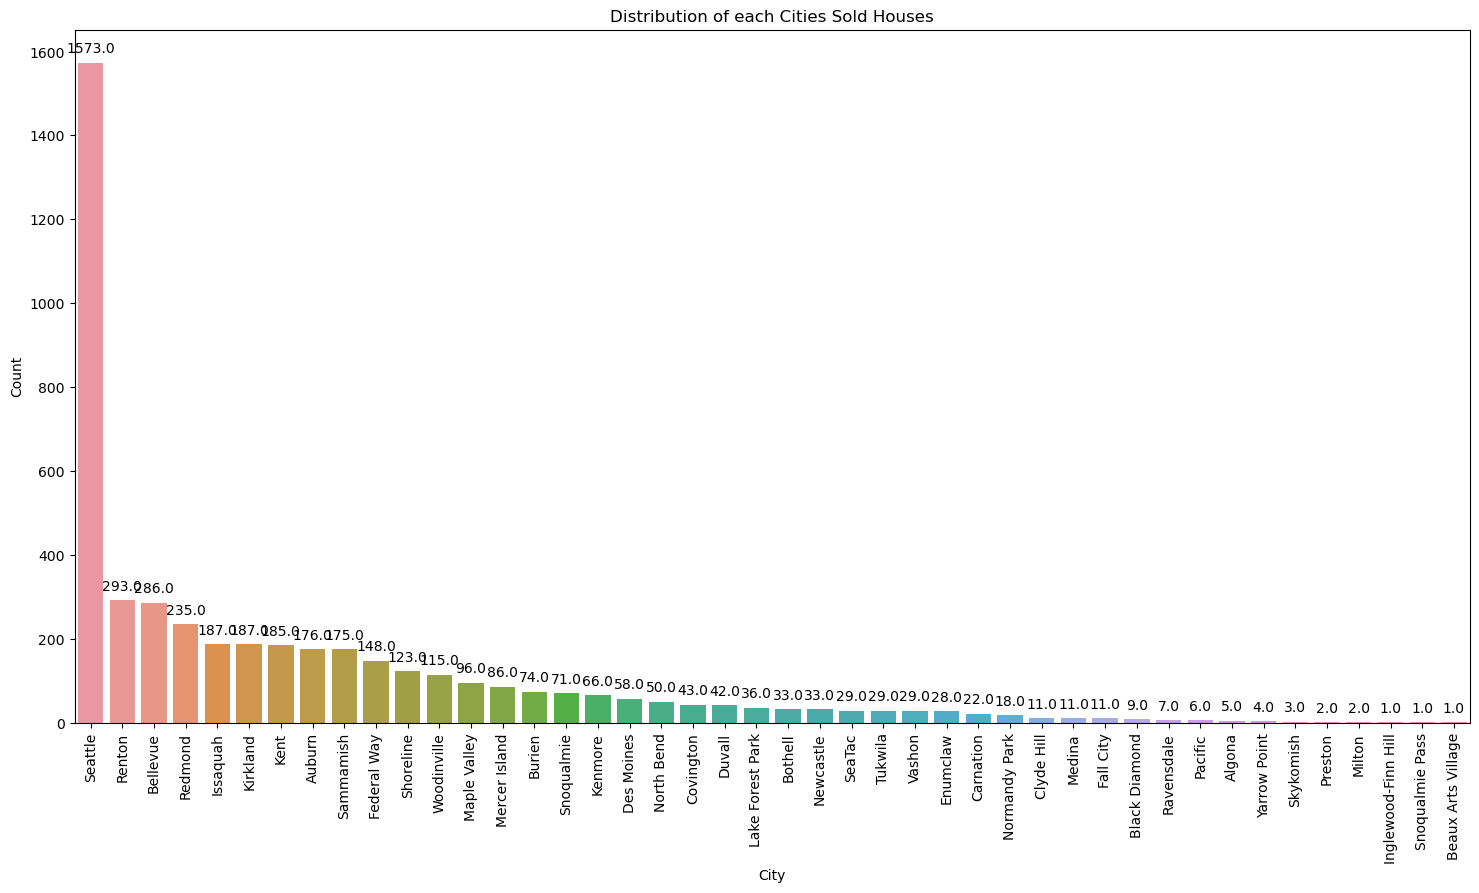

In [167]:
# Count each city's sold houses in the bar graph 
city_counts = House_Data['city'].value_counts()

# Sort the cities by count in descending order
sorted_cities = city_counts.index

plt.figure(figsize=(18, 9))
ax = sns.countplot(x='city', data=House_Data, order=sorted_cities)
plt.title('Distribution of each Cities Sold Houses')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# label each bar count values
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


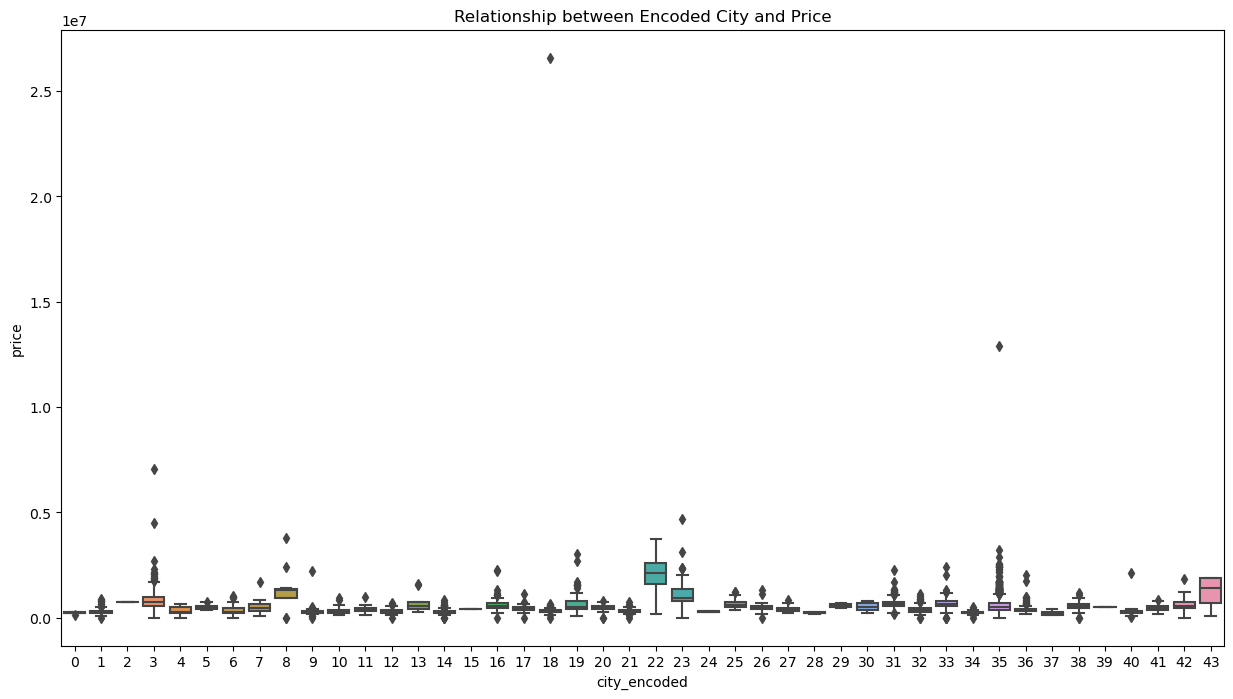

In [168]:
#Before check the outliers removal on the dataset
plt.figure(figsize=(15, 8))
sns.boxplot(x='city_encoded', y='price', data=House_Data)
plt.title('Relationship between Encoded City and Price')
plt.show()


In [169]:
#Define method to check outliers detections
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    outlier = data[((data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR)))]
    return outlier


In [170]:
#Select the attribute to check outliers on the dataset
data_outlier = find_outliers(House_Data[['price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'sqft_living',
                                     'sqft_lot', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'floors', 'condition', 'city_encoded']])

In [171]:
print("number of outlier: "+str(len(data_outlier)))

number of outlier: 4600


In [172]:
print("max outlier: "+str(data_outlier.max()))

max outlier: price            26590000.0
bedrooms                9.0
bathrooms               8.0
yr_built                NaN
yr_renovated            NaN
sqft_living         13540.0
sqft_lot          1074218.0
sqft_above           9410.0
sqft_basement        4820.0
waterfront              1.0
view                    4.0
floors                  NaN
condition               1.0
city_encoded            NaN
dtype: float64


In [173]:
print("min outlier: "+str(data_outlier.min()))

min outlier: price            1157200.0
bedrooms               0.0
bathrooms              0.0
yr_built               NaN
yr_renovated           NaN
sqft_living         4370.0
sqft_lot           20011.0
sqft_above          3990.0
sqft_basement       1530.0
waterfront             1.0
view                   1.0
floors                 NaN
condition              1.0
city_encoded           NaN
dtype: float64


In [174]:
data_outlier

,price,bedrooms,bathrooms,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,waterfront,view,floors,condition,city_encoded
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2384000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Drop the outliers 
def drop_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quamtile(0.75)
    IQR = q3 - q1
    remove_outlier = data[~((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    
    drop_outlier = outlie.dropna().reset_index()
    return drop_outlier
    data_outlier


In [281]:
def drop_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    remove_outlier = data[~((data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR)))]

    drop_outlier = remove_outlier.dropna().reset_index(drop=True)
    return drop_outlier


In [177]:
data_without_outliers = drop_outliers(House_Data[['price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 
                                              'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'floors', 'condition', 'city_encoded']])
data_without_outliers

,price,bedrooms,bathrooms,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,waterfront,view,floors,condition,city_encoded
0,313000.000000,3.0,1.50,1955,2005,1340.0,7912.0,1340.0,0.0,0.0,0.0,1.5,3.0,36
1,342000.000000,3.0,2.00,1966,0,1930.0,11947.0,1930.0,0.0,0.0,0.0,1.0,4.0,18
2,420000.000000,3.0,2.25,1963,0,2000.0,8030.0,1000.0,1000.0,0.0,0.0,1.0,4.0,3
3,550000.000000,4.0,2.50,1976,1992,1940.0,10500.0,1140.0,800.0,0.0,0.0,1.0,4.0,31
4,490000.000000,2.0,1.00,1938,1994,880.0,6380.0,880.0,0.0,0.0,0.0,1.0,3.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,308166.666667,3.0,1.75,1954,1979,1510.0,6360.0,1510.0,0.0,0.0,0.0,1.0,4.0,35
3444,534333.333333,3.0,2.50,1983,2009,1460.0,7573.0,1460.0,0.0,0.0,0.0,2.0,3.0,3
3445,416904.166667,3.0,2.50,2009,0,3010.0,7014.0,3010.0,0.0,0.0,0.0,2.0,3.0,32
3446,203400.000000,4.0,2.00,1974,0,2090.0,6630.0,1070.0,1020.0,0.0,0.0,1.0,3.0,35


<Axes: xlabel='bedrooms', ylabel='price'>

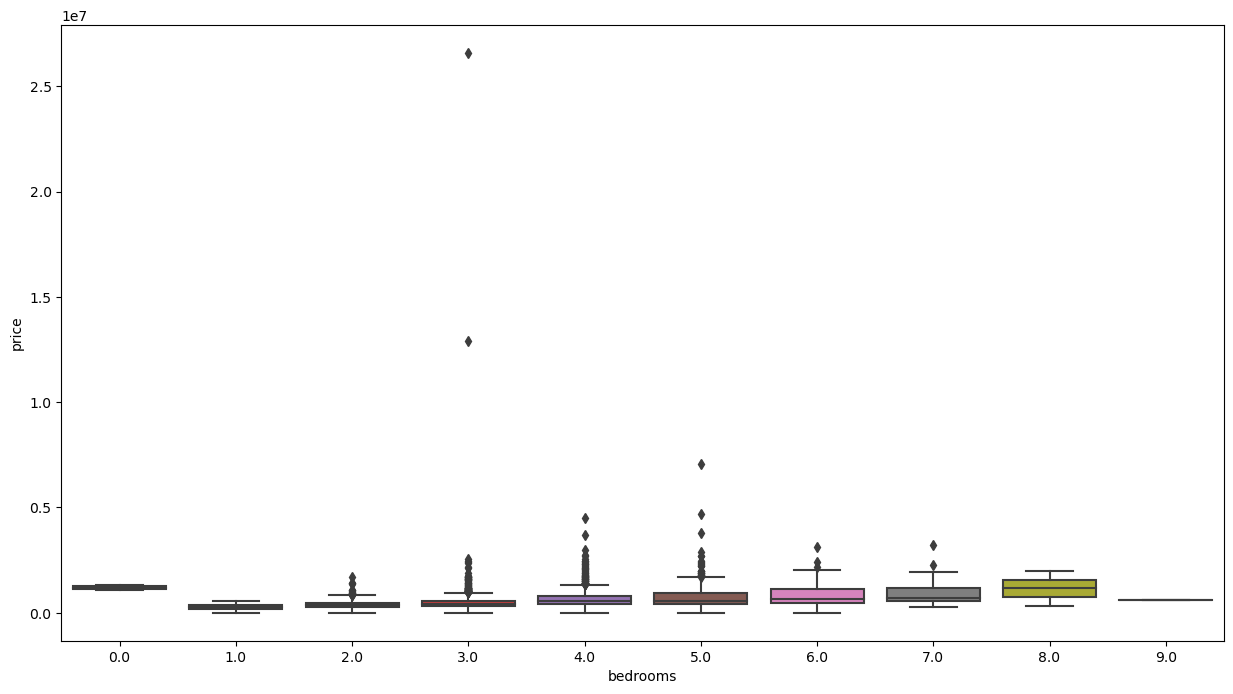

In [178]:
# Without cleaned the outlier on the bedrooms attribute dataset
plt.figure(figsize=(15,8))
sns.boxplot(x="bedrooms", y="price", data=House_Data)

<Axes: xlabel='bedrooms', ylabel='price'>

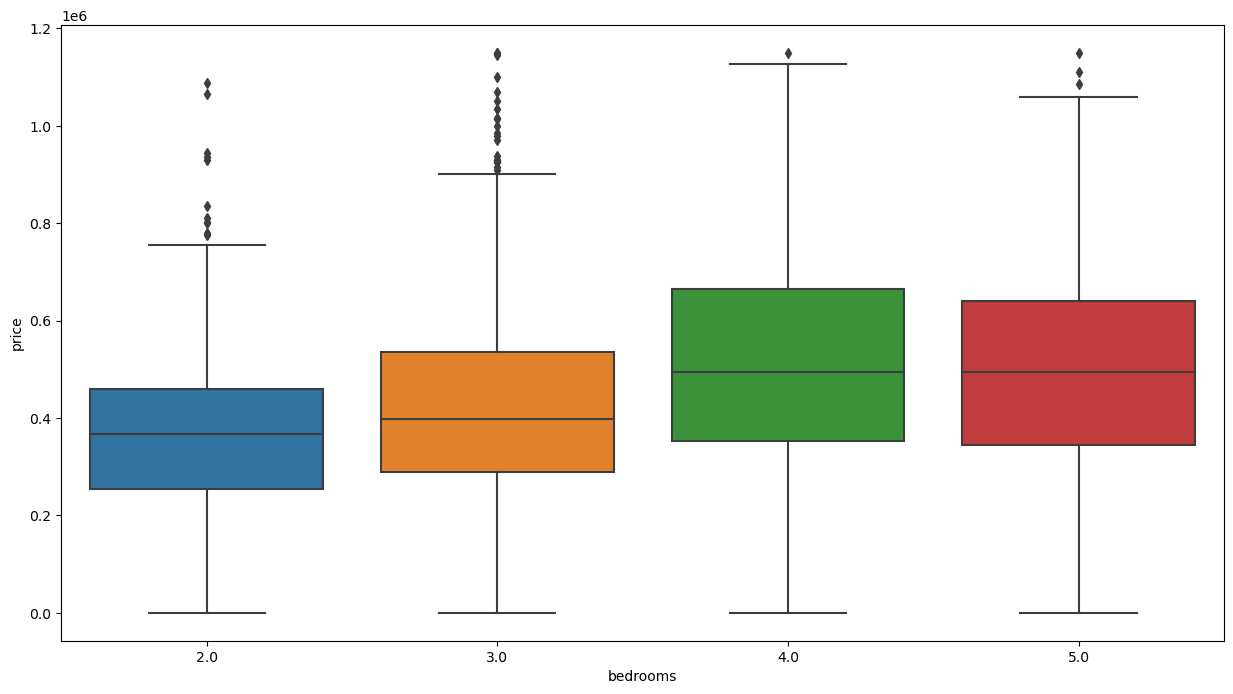

In [179]:
#After cleaned up the outlier check on the bedrooms attribute dataset
plt.figure(figsize=(15,8))
sns.boxplot(x="bedrooms", y="price", data=data_without_outliers)


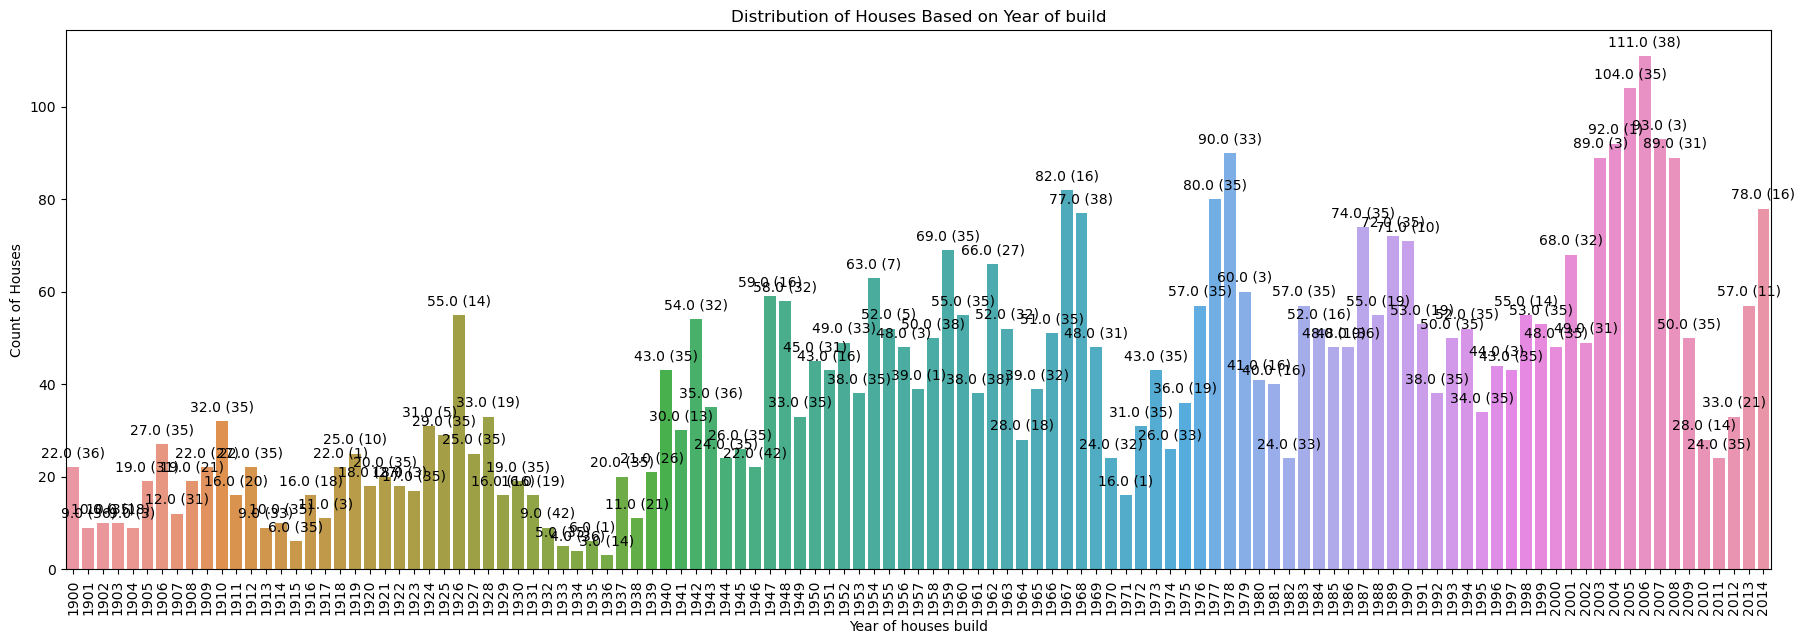

In [180]:
#count each year of houses built without cleaned outliers on yr_built attribute dataset
plt.figure(figsize=(22, 7))
ax = sns.countplot(x='yr_built', data=House_Data)
plt.xticks(rotation=90)
plt.xlabel('Year of houses build')
plt.ylabel('Count of Houses')
plt.title('Distribution of Houses Based on Year of build')

# Add labels above each bar
for p in ax.patches:
    x_index = int(p.get_x())  # Convert x-coordinate to integer index
    ax.annotate(f'{p.get_height()} ({House_Data.loc[x_index, "city_encoded"]})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

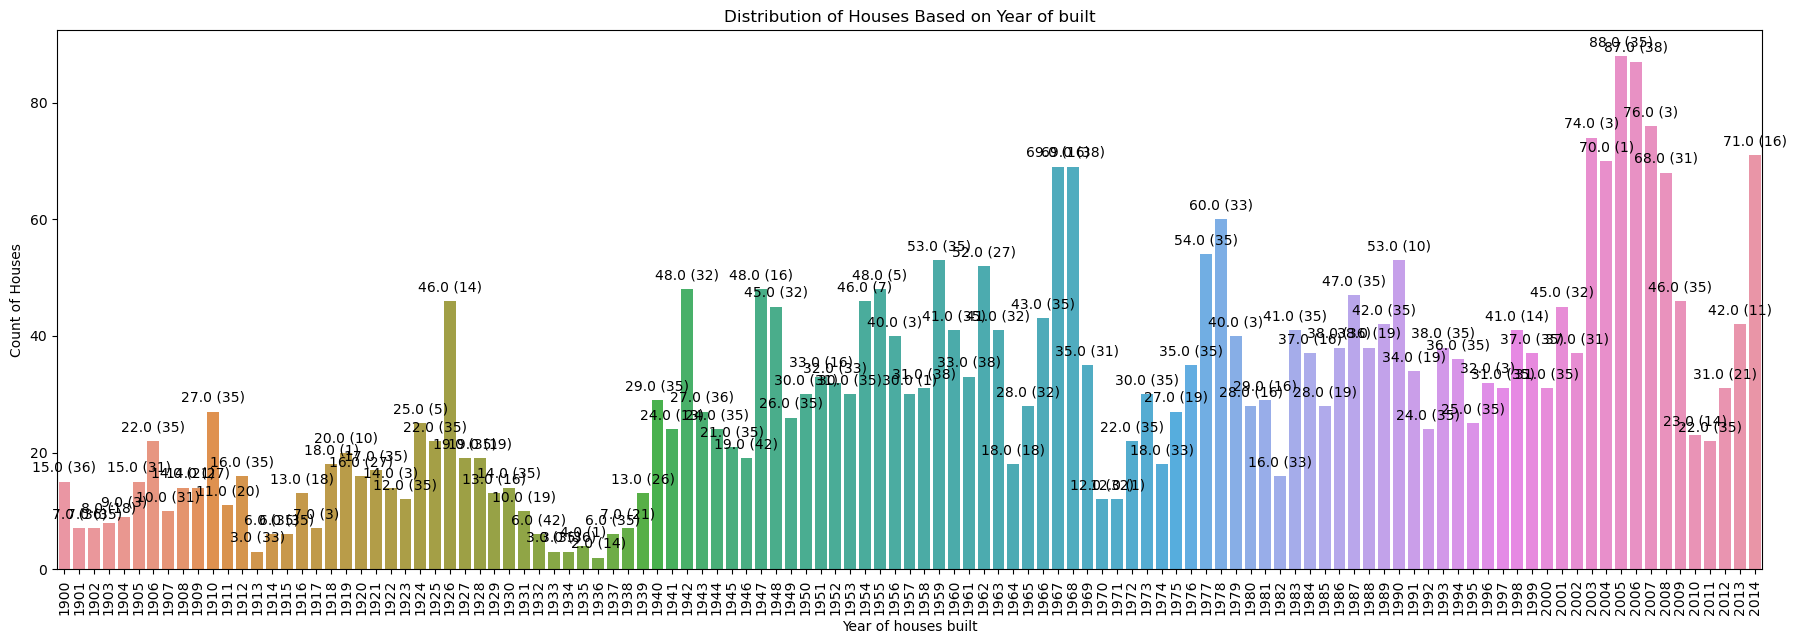

In [181]:
#count each year of houses built after cleaned outliers check yr_built attribute dataset
plt.figure(figsize=(22, 7))
ax = sns.countplot(x='yr_built', data=data_without_outliers)
plt.xticks(rotation=90)
plt.xlabel('Year of houses built')
plt.ylabel('Count of Houses')
plt.title('Distribution of Houses Based on Year of built')

# Add labels above each bar
for p in ax.patches:
    x_index = int(p.get_x())  # Convert x-coordinate to integer index
    ax.annotate(f'{p.get_height()} ({House_Data.loc[x_index, "city_encoded"]})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


<Axes: xlabel='bathrooms', ylabel='price'>

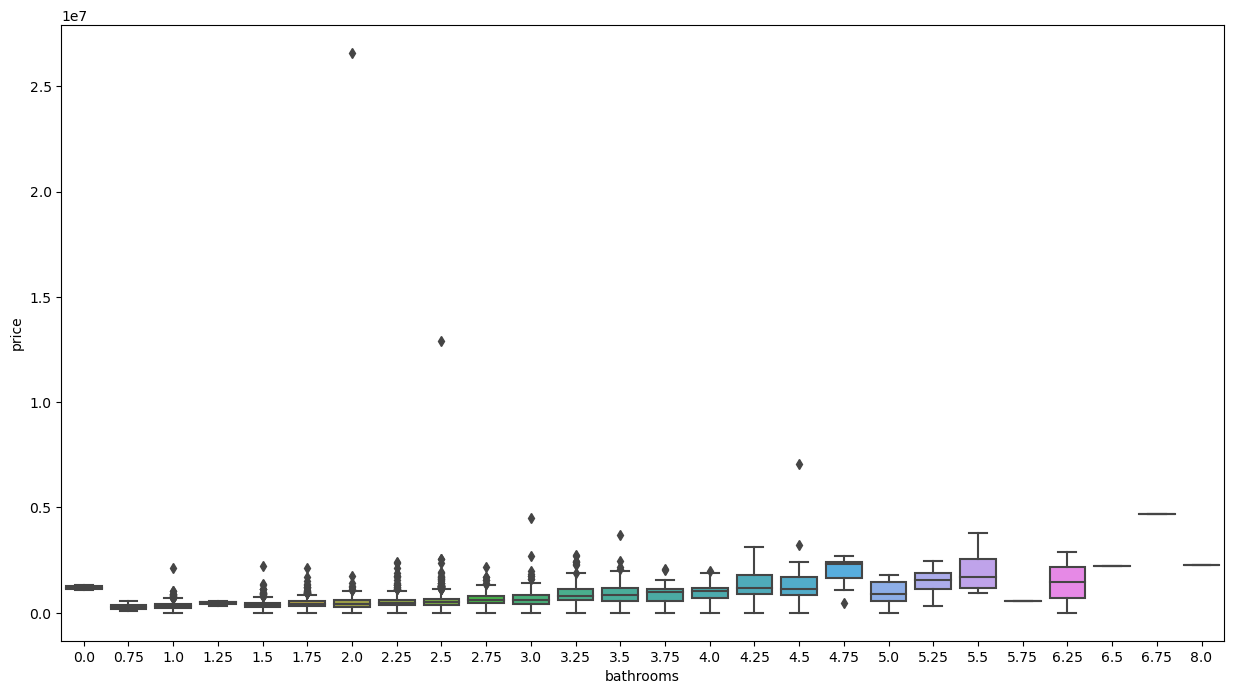

In [182]:
#Before outlier check the bathrooms vs price attribute
plt.figure(figsize=(15,8))
sns.boxplot(x="bathrooms", y="price", data=House_Data)

<Axes: xlabel='bathrooms', ylabel='price'>

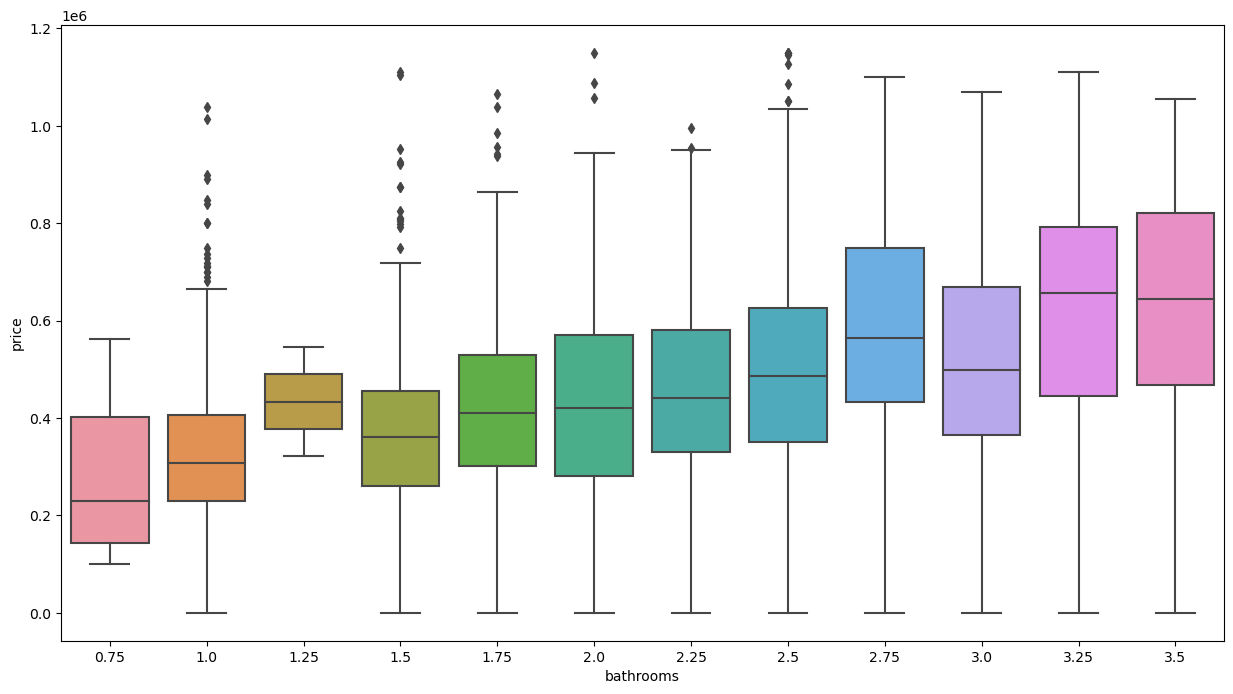

In [183]:
# After outlier cleaned the bathrooms dataset attribute
plt.figure(figsize=(15,8))
sns.boxplot(x="bathrooms", y="price", data=data_without_outliers)


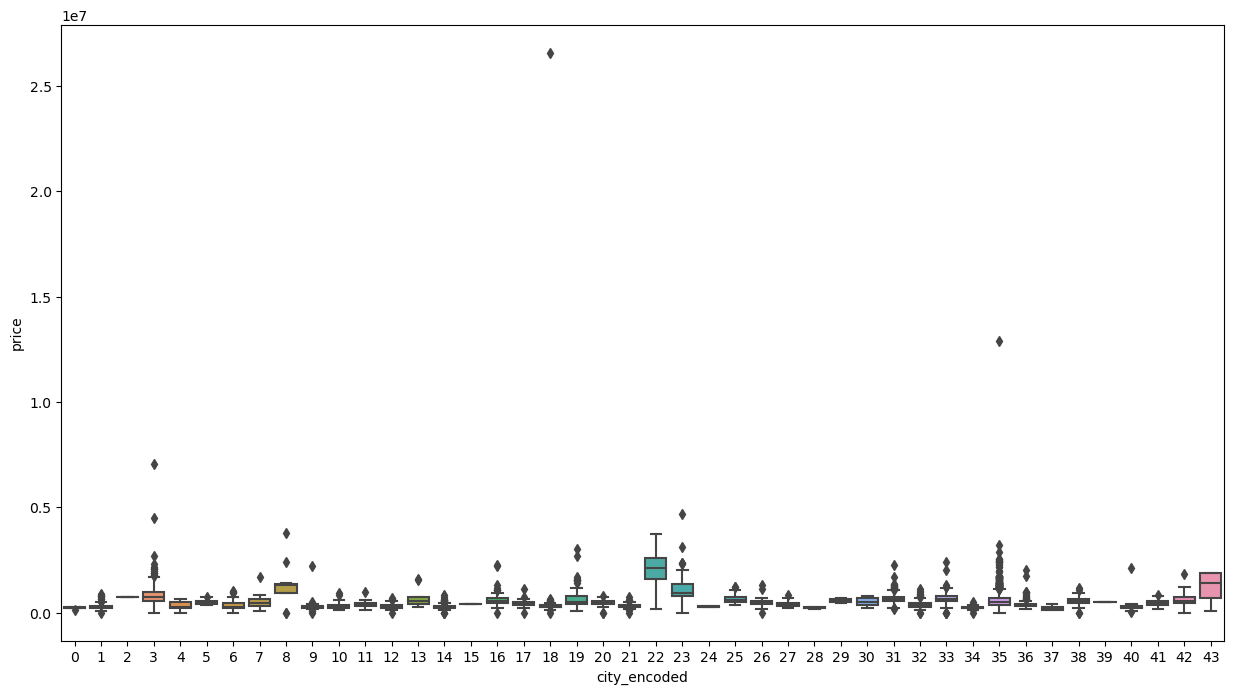

In [184]:
#Without checking outlier on the city_encoded attibute dataset
plt.figure(figsize=(15, 8))
sns.boxplot(x='city_encoded', y='price', data=House_Data)
plt.show()


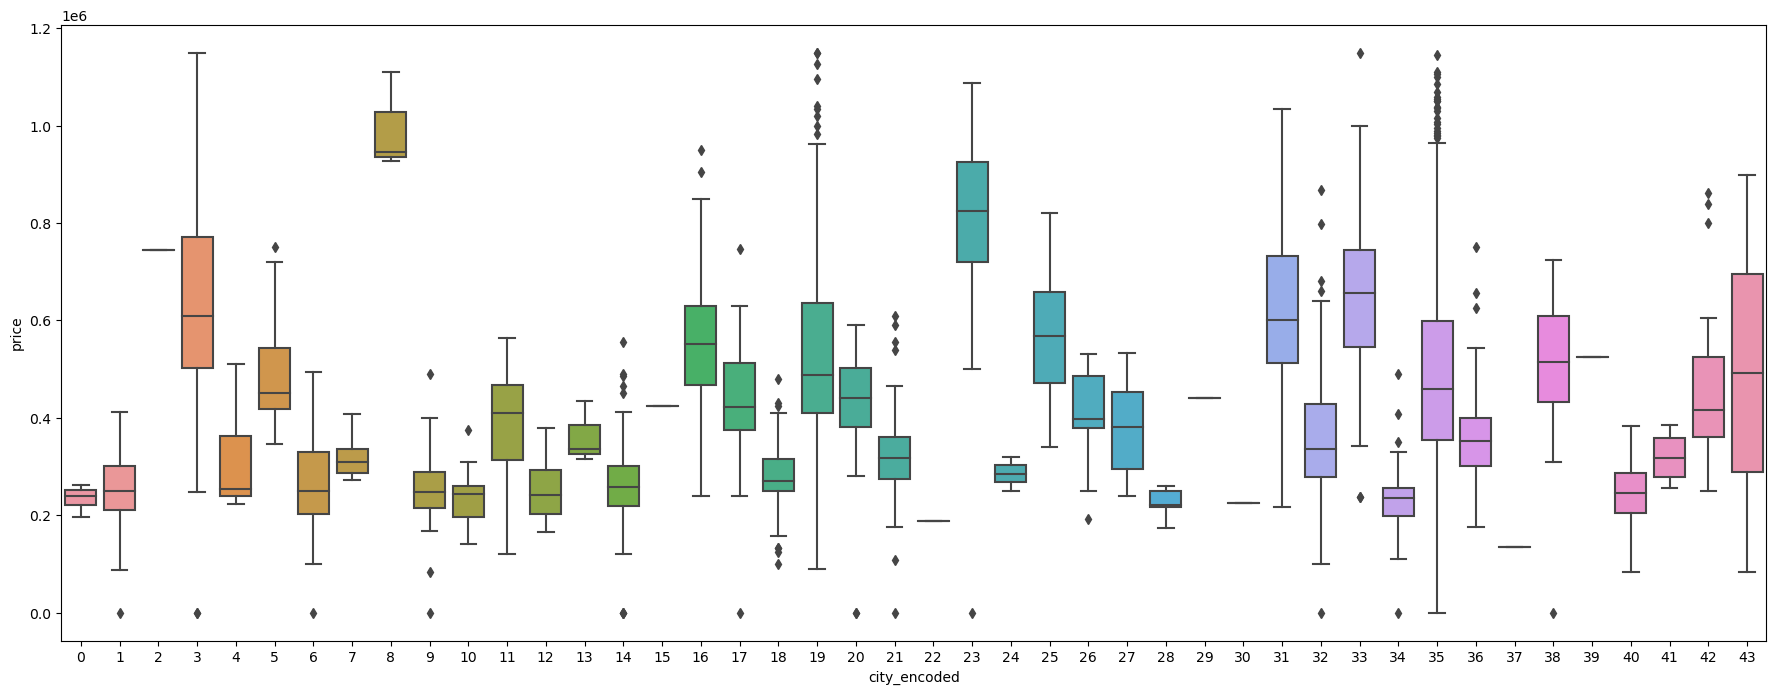

In [185]:
#After cleanded up outlier on the city_encoded attibute dataset results
plt.figure(figsize=(22, 8))
sns.boxplot(x='city_encoded', y='price', data=data_without_outliers)
plt.show()


<Axes: xlabel='waterfront', ylabel='price'>

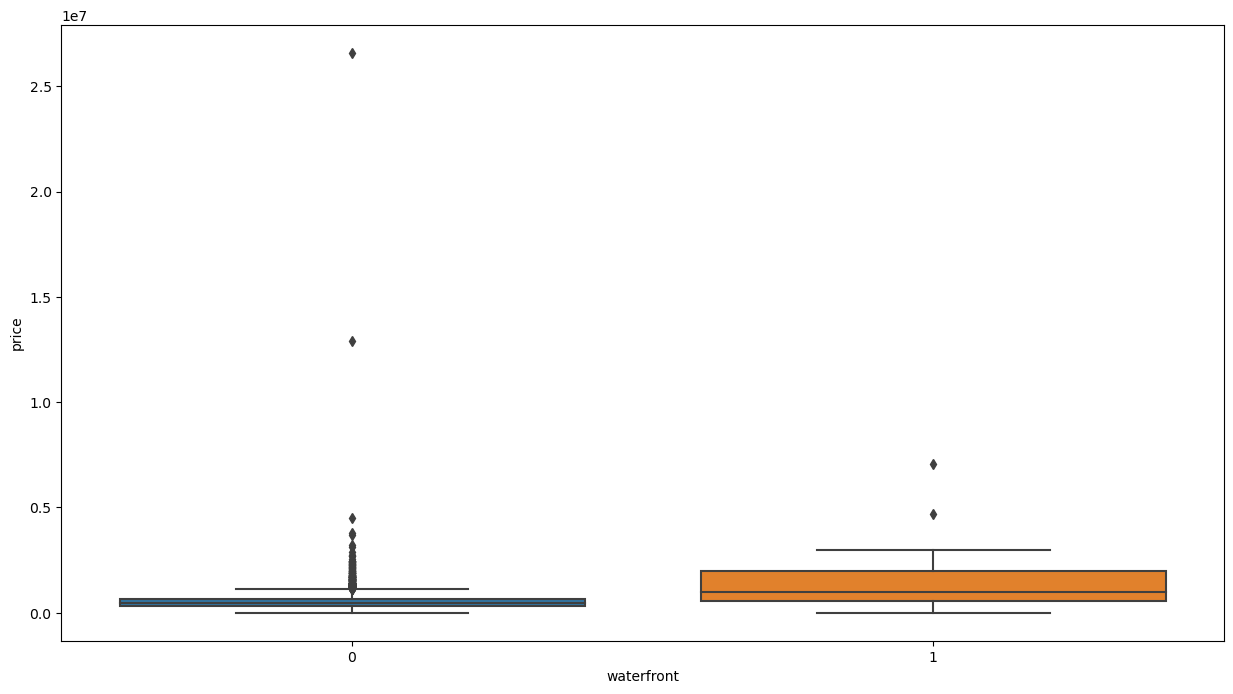

In [186]:
#Before outlier check the waterfront dataset attribute
plt.figure(figsize=(15,8))
sns.boxplot(x="waterfront", y="price", data=House_Data)


<Axes: xlabel='waterfront', ylabel='price'>

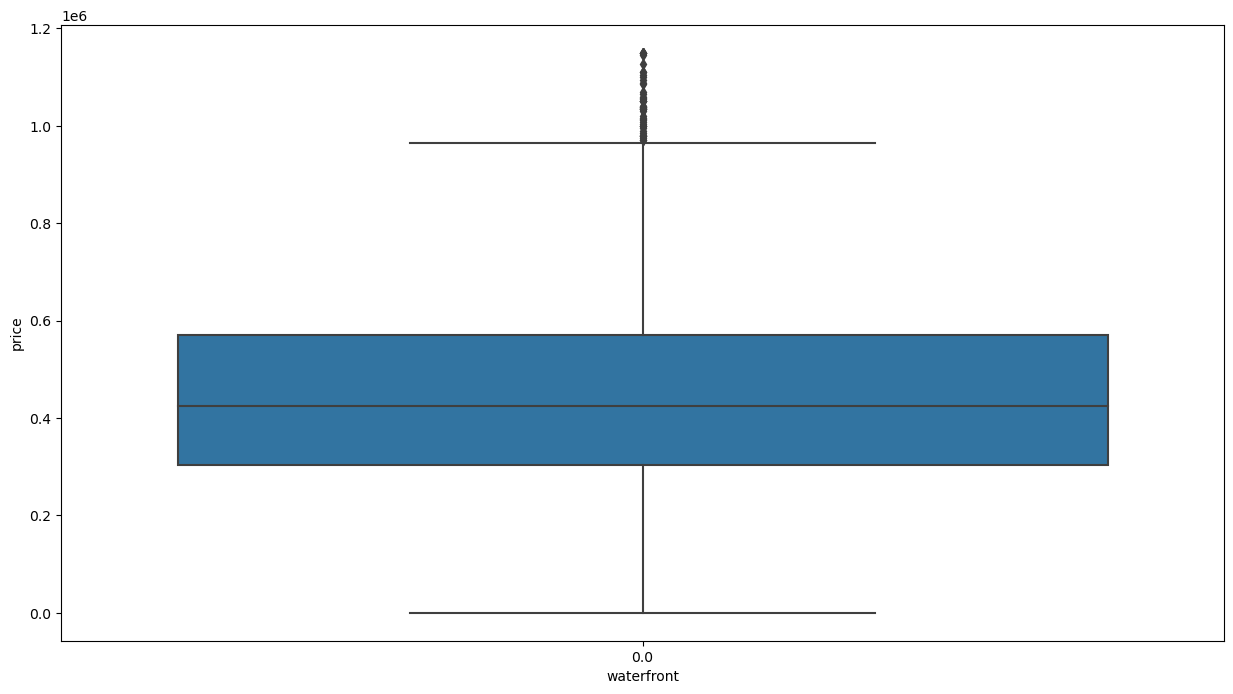

In [187]:
# After outlier cleaned the waterfront dataset attribute
plt.figure(figsize=(15,8))
sns.boxplot(x="waterfront", y="price", data=data_without_outliers)


<Axes: xlabel='floors', ylabel='price'>

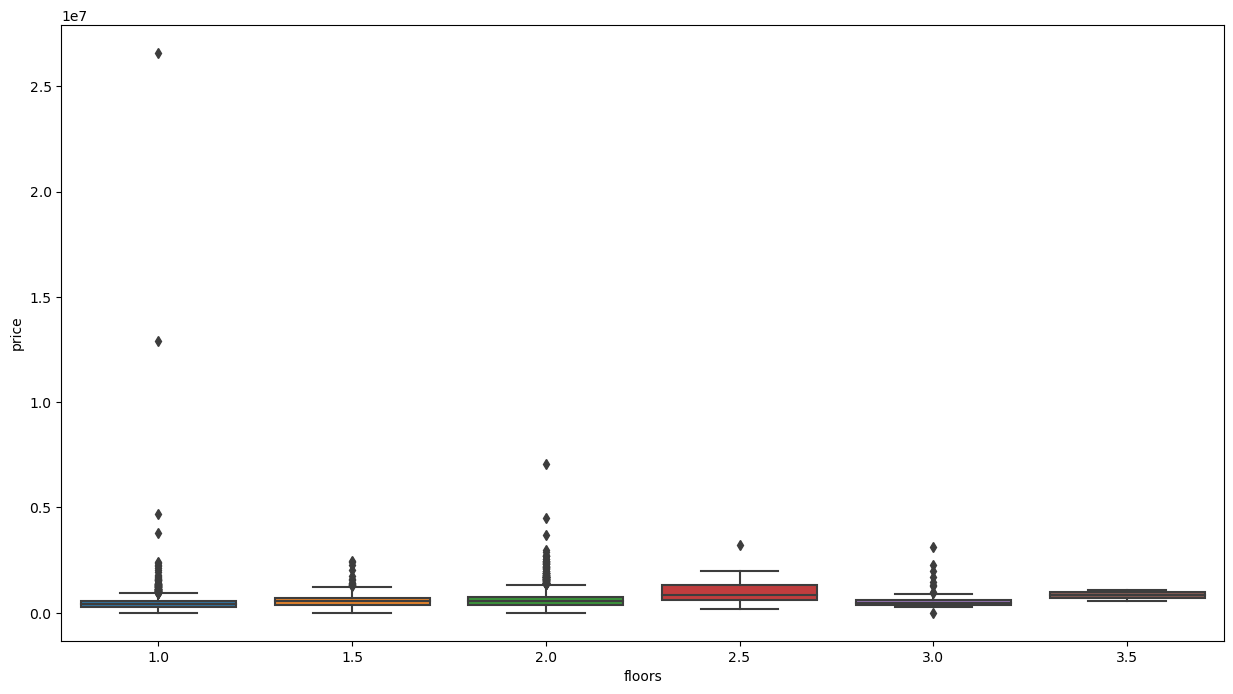

In [188]:
# Before outlier check the floors dataset attribute  
plt.figure(figsize=(15,8))
sns.boxplot(x="floors", y="price", data=House_Data)


<Axes: xlabel='floors', ylabel='price'>

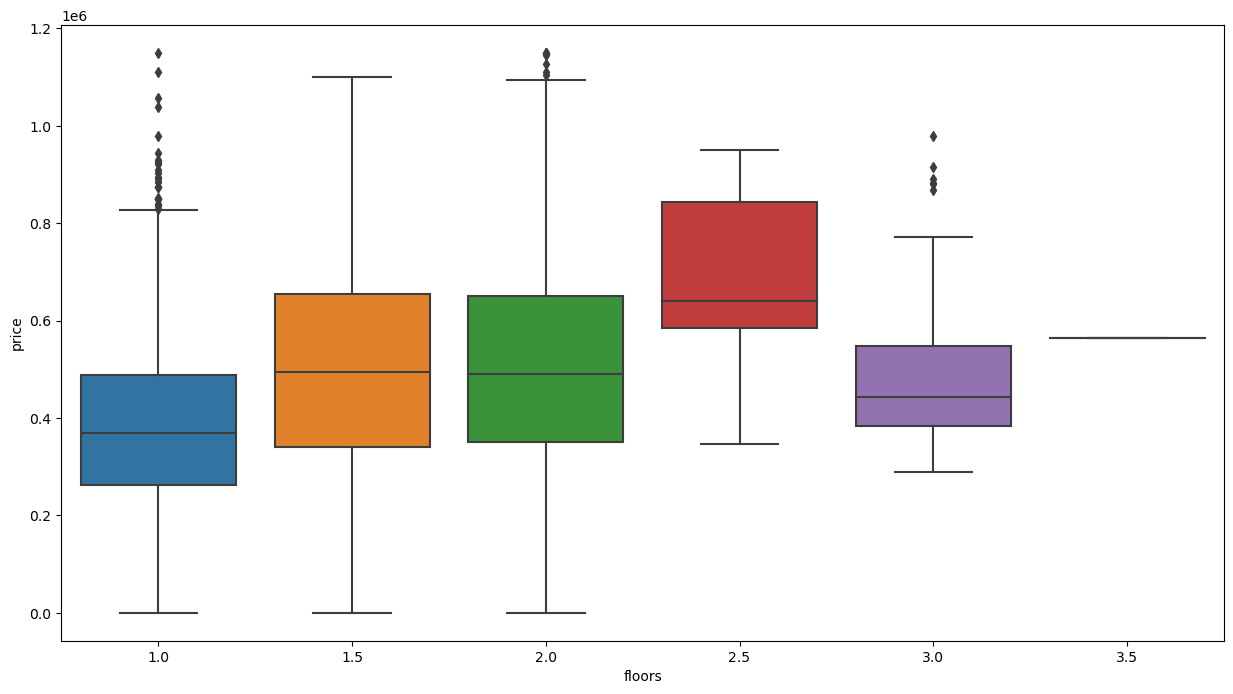

In [189]:
#After outlier cleaned floors dataset attribute result
plt.figure(figsize=(15,8))
sns.boxplot(x="floors", y="price", data=data_without_outliers)


<Axes: xlabel='view', ylabel='price'>

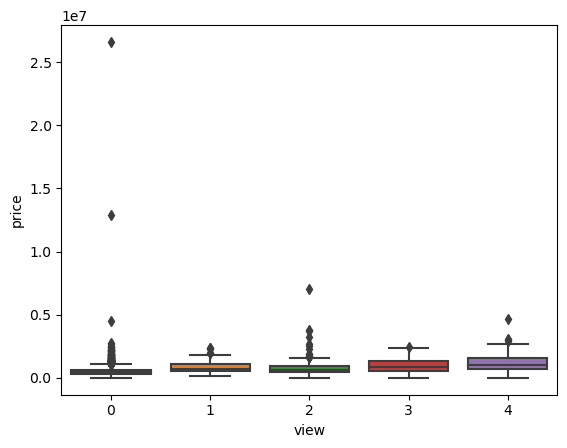

In [190]:
#Before outliers check the view on the dataset attribute
sns.boxplot(x='view', y='price', data=House_Data)


<Axes: xlabel='view', ylabel='price'>

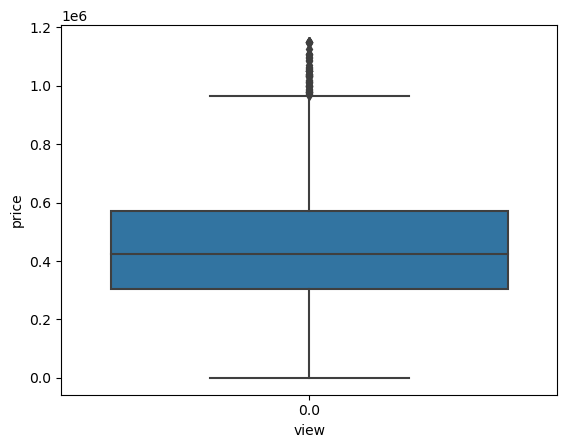

In [191]:
# After outliers cleaned the view on the dataset attribute
sns.boxplot(x='view', y='price', data=data_without_outliers)


<Axes: xlabel='condition', ylabel='price'>

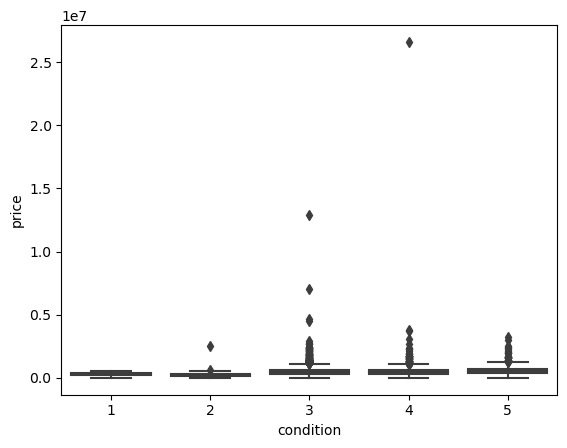

In [192]:
#Before outliers check the condition on the dataset attribute
sns.boxplot(x='condition', y='price', data=House_Data)

<Axes: xlabel='condition', ylabel='price'>

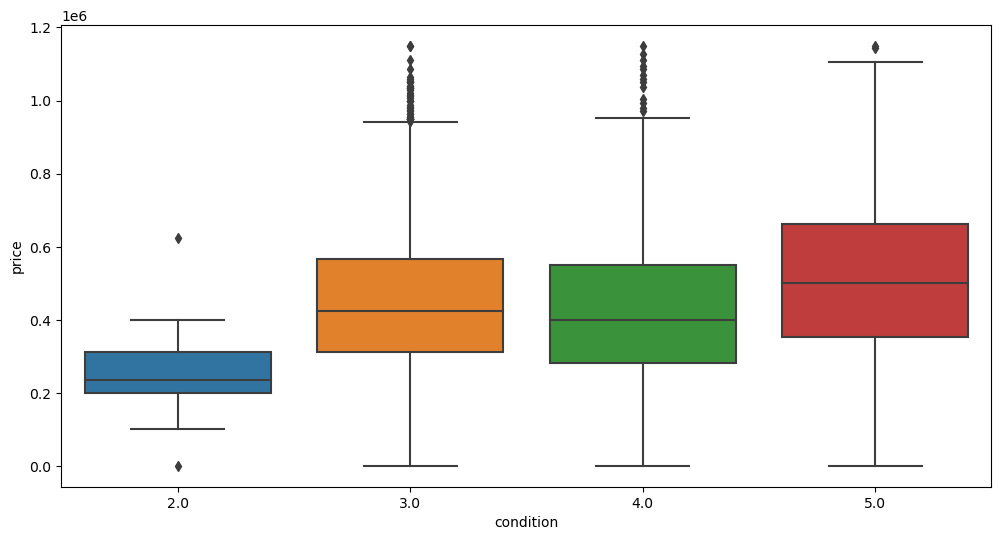

In [193]:
#After cleaned up the outliers check the condition on the dataset attribute
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=data_without_outliers)

In [194]:
data_without_outliers.describe()

,price,bedrooms,bathrooms,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,waterfront,view,floors,condition,city_encoded
count,3.448000e+03,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.0,3448.0,3448.000000,3448.000000,3448.000000
mean,4.541016e+05,3.289443,2.019939,1970.857889,804.484919,1885.550754,7201.772912,1642.646752,242.904002,0.0,0.0,1.495795,3.447506,25.930974
std,1.983523e+05,0.780740,0.654661,30.120021,978.540995,667.449999,3594.135959,664.193938,371.243916,0.0,0.0,0.545225,0.662848,11.652740
min,0.000000e+00,2.000000,0.750000,1900.000000,0.000000,580.000000,681.000000,580.000000,0.000000,0.0,0.0,1.000000,2.000000,0.000000
25%,3.040000e+05,3.000000,1.500000,1951.000000,0.000000,1380.000000,4734.750000,1140.000000,0.000000,0.0,0.0,1.000000,3.000000,18.000000
50%,4.247500e+05,3.000000,2.000000,1974.000000,0.000000,1820.000000,7199.000000,1460.000000,0.000000,0.0,0.0,1.500000,3.000000,32.000000
75%,5.700000e+05,4.000000,2.500000,1998.000000,1999.000000,2310.000000,9250.250000,2030.000000,500.000000,0.0,0.0,2.000000,4.000000,35.000000
max,1.150000e+06,5.000000,3.500000,2014.000000,2014.000000,4140.000000,20000.000000,3960.000000,1500.000000,0.0,0.0,3.500000,5.000000,43.000000


/var/folders/mt/vslqx1qn1ygc6h862g97nbbr0000gn/T/ipykernel_5161/1084605273.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(KcData["price"], fit=norm)


<Axes: xlabel='price', ylabel='Density'>

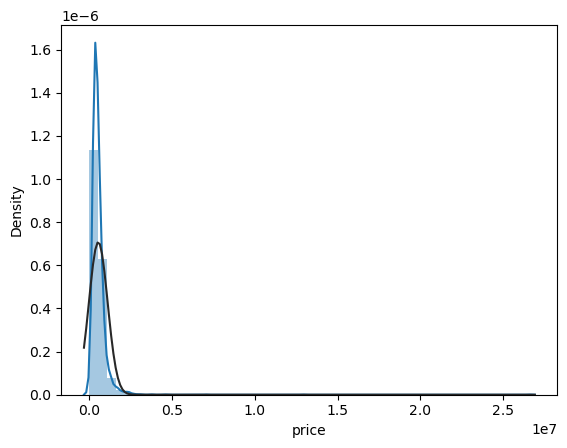

In [195]:
#Before outlier check on the provide dataset the distrbution plot to examine target variable
'''
to visualize the distribution of the "price" variable and compare it to a normal distribution. 
The fitted normal distribution curve helps in assessing how well the data follows a normal distribution. 
If the histogram closely matches the normal distribution curve, 
it suggests that the data is approximately normally distributed. 
If there are deviations, it indicates non-normality.

'''
#plt.figure(figsize=(11,6))
sns.distplot(KcData["price"], fit=norm)

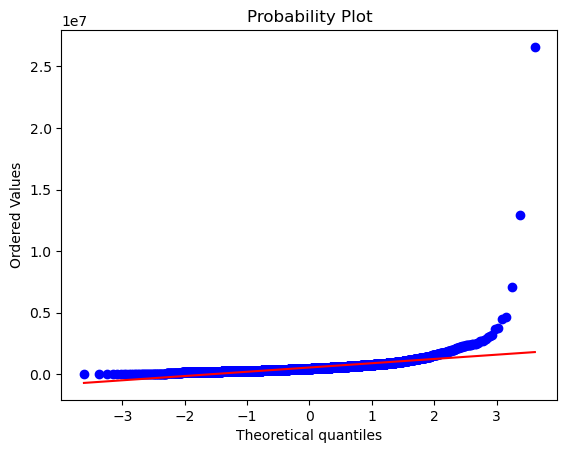

In [197]:
#Before the dataset outlier cleaned on the traget variable  
from scipy import stats
prob_log = stats.probplot(KcData["price"], plot=plt)
plt.show()

/var/folders/mt/vslqx1qn1ygc6h862g97nbbr0000gn/T/ipykernel_5161/3398100642.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_outliers["price"], fit=norm)


<Axes: xlabel='price', ylabel='Density'>

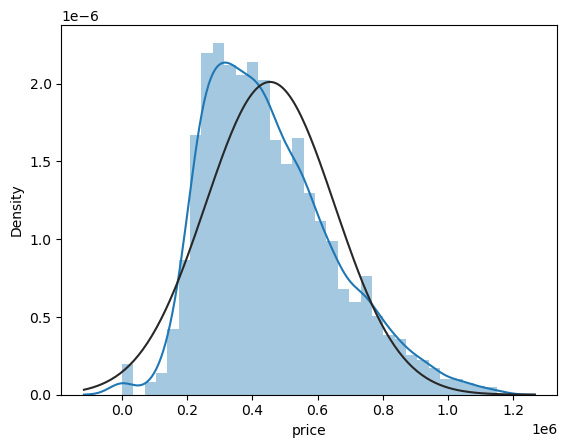

In [198]:
#After outlier check on the provide dataset the distrbution plot to examine target variable
'''
To visualize the distribution of the "price" variable and compare it to a normal distribution. 
The fitted normal distribution curve helps in assessing how well the data follows a normal distribution. 
If the histogram closely matches the normal distribution curve, 
it suggests that the data is approximately normally distributed. 
If there are deviations, it indicates non-normality.

'''
#plt.figure(figsize=(11,8))

#To visualize the distribution of the "price" variable using a normal distribution. 
sns.distplot(data_without_outliers["price"], fit=norm)

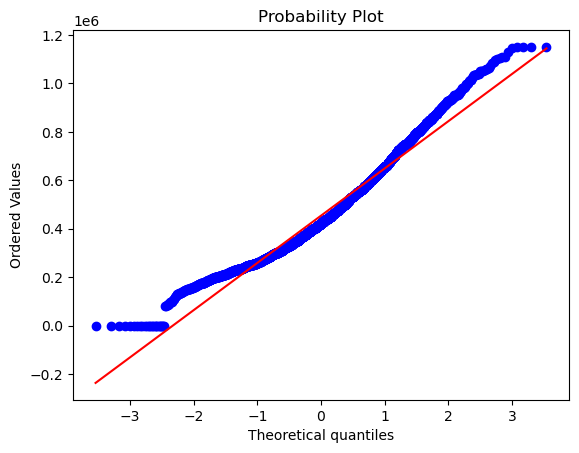

In [199]:
#After the dataset outlier cleaned on the traget variable  
from scipy import stats
prob_log = stats.probplot(data_without_outliers["price"], plot=plt)
plt.show()

/var/folders/mt/vslqx1qn1ygc6h862g97nbbr0000gn/T/ipykernel_5161/3957801445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KcData.corr(), annot=True)


<Axes: >

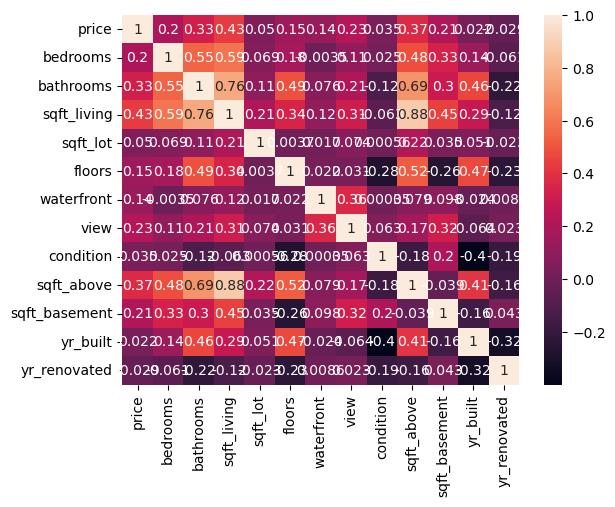

In [200]:
#Before outliers check the data
sns.heatmap(KcData.corr(), annot=True)

<Axes: >

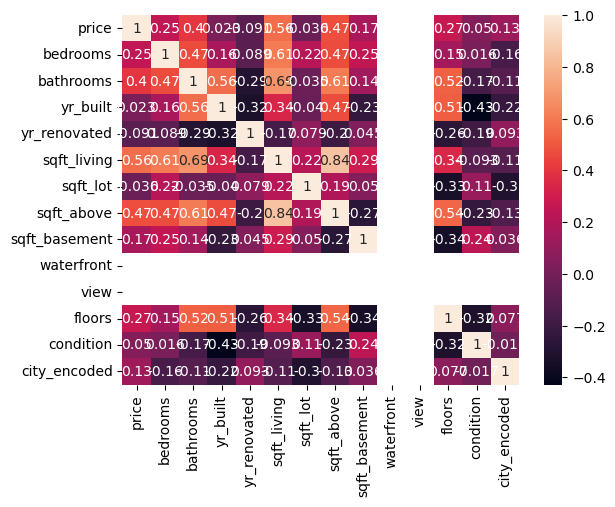

In [201]:
#Check the correlation after cleaned the outliers on the dataset
sns.heatmap(data_without_outliers.corr(), annot=True)

In [202]:
#After checking the correlation waterfront and view didn't corrlate with any attributes better to drop on the data
data_without_outliers = data_without_outliers.drop(['waterfront', 'view'], axis=1)
data_without_outliers


,price,bedrooms,bathrooms,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,condition,city_encoded
0,313000.000000,3.0,1.50,1955,2005,1340.0,7912.0,1340.0,0.0,1.5,3.0,36
1,342000.000000,3.0,2.00,1966,0,1930.0,11947.0,1930.0,0.0,1.0,4.0,18
2,420000.000000,3.0,2.25,1963,0,2000.0,8030.0,1000.0,1000.0,1.0,4.0,3
3,550000.000000,4.0,2.50,1976,1992,1940.0,10500.0,1140.0,800.0,1.0,4.0,31
4,490000.000000,2.0,1.00,1938,1994,880.0,6380.0,880.0,0.0,1.0,3.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...
3443,308166.666667,3.0,1.75,1954,1979,1510.0,6360.0,1510.0,0.0,1.0,4.0,35
3444,534333.333333,3.0,2.50,1983,2009,1460.0,7573.0,1460.0,0.0,2.0,3.0,3
3445,416904.166667,3.0,2.50,2009,0,3010.0,7014.0,3010.0,0.0,2.0,3.0,32
3446,203400.000000,4.0,2.00,1974,0,2090.0,6630.0,1070.0,1020.0,1.0,3.0,35


In [203]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
import warnings
# warnings.filterwarnings("ignore")


In [204]:
#x(Independent variables) and y(target variables)
x = data_without_outliers.iloc[:, :]
y = data_without_outliers['price']


#splitting the data into train, test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

# # scale the data
# scale = StandardScaler().fit(x_train)
# x_train_scale_val = scale.transform(x_train)
# x_test_scale_val = scale.transform(x_test)

((2586, 12), (862, 12), (2586,), (862,))

In [205]:
# scale the data
scale = StandardScaler().fit(x_train)
x_train_scale_val = scale.transform(x_train)
x_test_scale_val = scale.transform(x_test)

In [206]:
# Data Modeling predict
# Fit the linear Regression
pr_ln = LinearRegression().fit(x_train_scale_val, y_train)

In [207]:
# The of traning and testing score 
trian_score_ln = pr_ln.score(x_train_scale_val, y_train)
test_score_ln = pr_ln.score(x_test_scale_val, y_test)

In [208]:
# The result of training and testing score
print("Model: Linear Regression")
print("Training Score: ", trian_score_ln )
print("Testing Score: ", test_score_ln)

Model: Linear Regression
Training Score:  1.0
Testing Score:  1.0


In [209]:
#Random Forest mode
#Fit The random Forest model with dataset
pr_rf = RandomForestRegressor(n_estimators=150, 
                             random_state = 50, max_depth = 3).fit(x_train, y_train)

In [210]:
# The of traning and testing score 
trian_score_rf = pr_rf.score(x_train, y_train)
test_score_rf = pr_rf.score(x_test_scale_val, y_test)

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [211]:
print("Model: Random Forest Regressor")
print("Training Score: ", trian_score_rf )
print("Testing Score: ", test_score_rf)

Model: Random Forest Regressor
Training Score:  0.9759449373629278
Testing Score:  -1.8898204526120352


In [212]:
#Decision Tree Model
# Fit The Decision Tree Model with data
pr_tree = DecisionTreeRegressor(splitter='best', max_depth=None, 
                                  min_samples_split=2,min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0,max_features=None, 
                                  random_state= 42, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, ccp_alpha=0.0,).fit(x_train, y_train)


In [213]:
# The of traning and testing score 
trian_score_tr = pr_tree.score(x_train, y_train)
test_score_tr = pr_tree.score(x_test, y_test)

In [214]:
print("Model: Decision Tree Regressor")
print("Training Score: ", trian_score_tr )
print("Testing Score: ", test_score_tr)

Model: Decision Tree Regressor
Training Score:  1.0
Testing Score:  0.9999679069917461


In [215]:
# Support Vector Regressor Model
pr_svr = SVR(kernel = "rbf").fit(x_train_scale_val, y_train)


In [337]:
# The of traning and testing score 
trian_score_svr = pr_svr.score(x_train, y_train)
test_score_svr = pr_svr.score(x_test_scale_val, y_test)

In [338]:
print("Model: Support Vector Regressor")
print("Training Score: ", trian_score_svr )
print("Testing Score: ", test_score_svr)

Model: Support Vector Regressor
Training Score:  -1324082903.061367
Testing Score:  -0.023338337116650232


In [339]:
# Lasso Model predict 
# Fit Lasso model with data train and test
pr_las = Lasso(alpha = 1.0, max_iter =1000).fit(x_train_scale_val, y_train)

In [340]:
# The of traning and testing score 
trian_score_las = pr_las.score(x_train_scale_val, y_train)
test_score_las = pr_las.score(x_test_scale_val, y_test)

In [341]:
print("Model: Lasso Regression")
print("Training Score: ", trian_score_las )
print("Testing Score: ", test_score_las)

Model: Lasso Regression
Training Score:  0.9926037056339532
Testing Score:  -5.182927612677855


In [221]:
# Ridge Model
# Fit the Ridge model with data
pr_rid = Ridge(alpha = 100).fit(x_train, y_train)

In [222]:
# The of traning and testing score 
trian_score_rid = pr_rid.score(x_train_scale_val, y_train)
test_score_rid = pr_rid.score(x_test_scale_val, y_test)

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [223]:
print("Model: Ridge Regression")
print("Training Score: ", trian_score_rid )
print("Testing Score: ", test_score_rid)

Model: Ridge Regression
Training Score:  -5.262763803844277
Testing Score:  -5.183524939505755


In [224]:
#Predict the price with decision Tree model 
import pandas as pd
y_pred = pr_tree.predict(x_train)
pd.DataFrame({"Prediction": y_pred, "Actual": y_train})

,Prediction,Actual
491,372977.000000,372977.000000
2203,395000.000000,395000.000000
1368,222400.000000,222400.000000
3042,230000.000000,230000.000000
3346,423050.925926,423050.925926
...,...,...
835,344500.000000,344500.000000
3264,230000.000000,230000.000000
1653,800000.000000,800000.000000
2607,580000.000000,580000.000000


In [225]:
# Predict the price with decision Tree model 
import pandas as pd
y_pred_tree = pr_tree.predict(x_test)
pd.DataFrame({"Prediction": y_pred_tree, "Actual": y_test})

,Prediction,Actual
1523,270000.0,270000.0
3044,438000.0,438000.0
3303,0.0,0.0
2741,245000.0,245000.0
1255,630000.0,629000.0
...,...,...
1939,631625.0,632500.0
1618,270000.0,270000.0
2888,480500.0,481015.0
2102,507500.0,507000.0


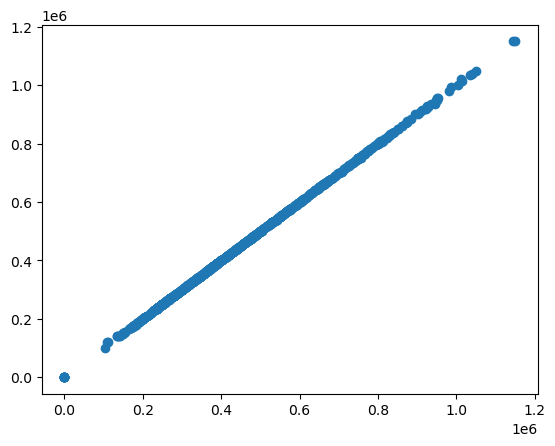

In [226]:
plt.scatter(y_test, y_pred_tree)

In [227]:
# Predict the price with Random Forest model 
import pandas as pd
y_pred_rf = pr_rf.predict(x_test)
pd.DataFrame({"Actual": y_test, "Prediction": y_pred_rf})

,Actual,Prediction
1523,270000.0,284872.140546
3044,438000.0,460819.481797
3303,0.0,179932.643363
2741,245000.0,281757.029777
1255,629000.0,651664.581846
...,...,...
1939,632500.0,652472.380039
1618,270000.0,284872.140546
2888,481015.0,460819.481797
2102,507000.0,517038.168451


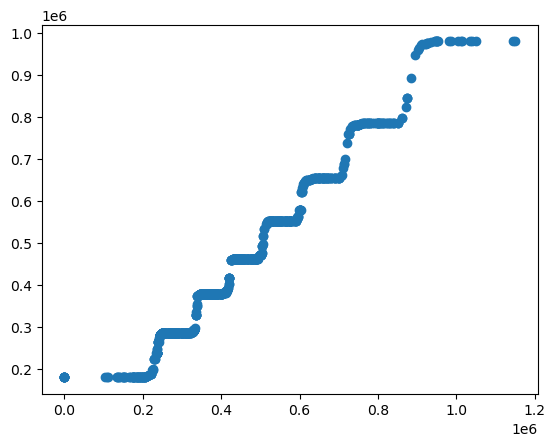

In [228]:
plt.scatter(y_test, y_pred_rf)

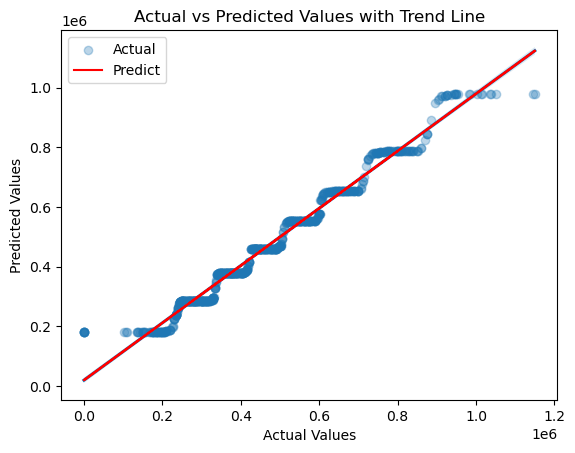

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting y_test and y_pred_rid are actual and predicted values
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Trend Line')

trend_line = np.polyfit(y_test, y_pred_rf, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()

In [230]:
# Predict the price with Linear Regression model 
import pandas as pd
y_pred_ln = pr_ln.predict(x_test)
pd.DataFrame({"Prediction": y_pred_ln, "Actual": y_test})

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
1523,5.344375e+10,270000.0
3044,8.669735e+10,438000.0
3303,4.540846e+05,0.0
2741,4.849529e+10,245000.0
1255,1.245035e+11,629000.0
...,...,...
1939,1.251963e+11,632500.0
1618,5.344375e+10,270000.0
2888,9.521166e+10,481015.0
2102,1.003551e+11,507000.0


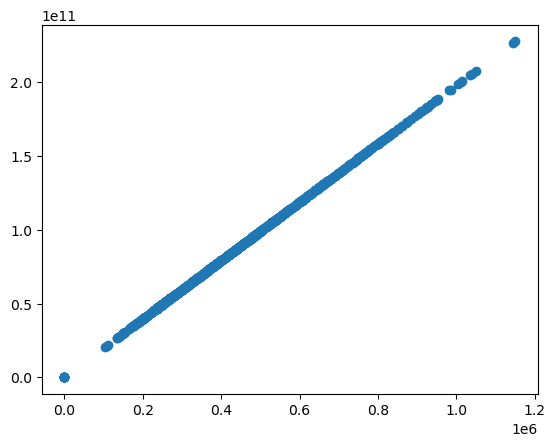

In [231]:
plt.scatter(y_test, y_pred_ln)

In [232]:
# Predict the price with Lasso Regression model 
import pandas as pd
y_pred_las = pr_las.predict(x_test)
pd.DataFrame({"Prediction": y_pred_las, "Actual": y_test})

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


,Prediction,Actual
1523,5.344348e+10,270000.0
3044,8.669691e+10,438000.0
3303,4.540846e+05,0.0
2741,4.849505e+10,245000.0
1255,1.245029e+11,629000.0
...,...,...
1939,1.251957e+11,632500.0
1618,5.344348e+10,270000.0
2888,9.521118e+10,481015.0
2102,1.003546e+11,507000.0


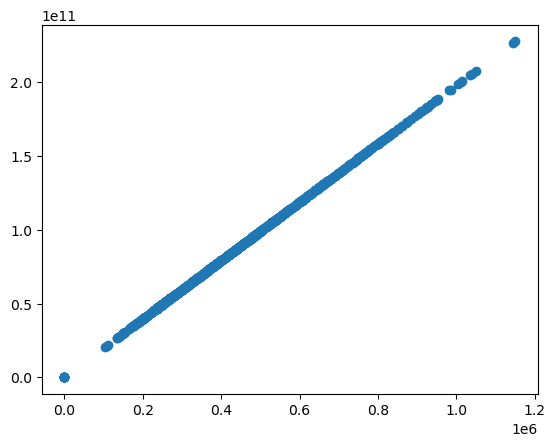

In [233]:
plt.scatter(y_test, y_pred_las)

In [234]:
# Predict the price with Support Vector Regressor model 
import pandas as pd
y_pred_svr = pr_svr.predict(x_test)
pd.DataFrame({"Prediction": y_pred_svr, "Actual": y_test})

/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


,Prediction,Actual
1523,423133.170703,270000.0
3044,423133.170703,438000.0
3303,423133.170703,0.0
2741,423133.170703,245000.0
1255,423133.170703,629000.0
...,...,...
1939,423133.170703,632500.0
1618,423133.170703,270000.0
2888,423133.170703,481015.0
2102,423133.170703,507000.0


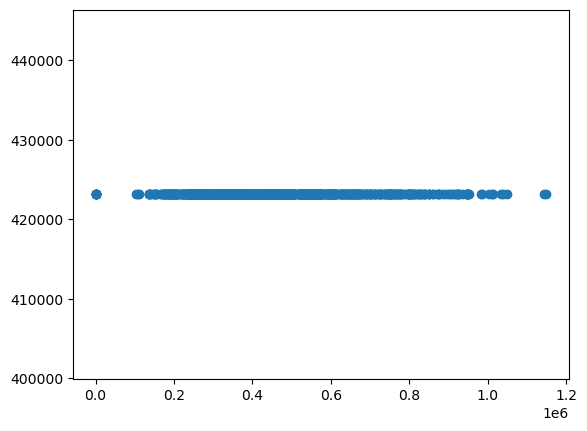

In [235]:
plt.scatter(y_test, y_pred_svr)

In [236]:
#Predict the price with Ridge Regressor model 
import pandas as pd
y_pred_rid = pr_rid.predict(x_test)
pd.DataFrame({"Prediction": y_pred_rid, "Actual": y_test})

,Prediction,Actual
1523,2.700000e+05,270000.0
3044,4.380000e+05,438000.0
3303,6.986619e-07,0.0
2741,2.450000e+05,245000.0
1255,6.290000e+05,629000.0
...,...,...
1939,6.325000e+05,632500.0
1618,2.700000e+05,270000.0
2888,4.810150e+05,481015.0
2102,5.070000e+05,507000.0


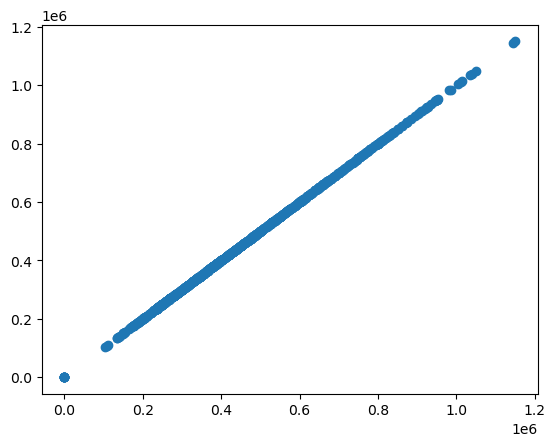

In [237]:
plt.scatter(y_test, y_pred_rid)

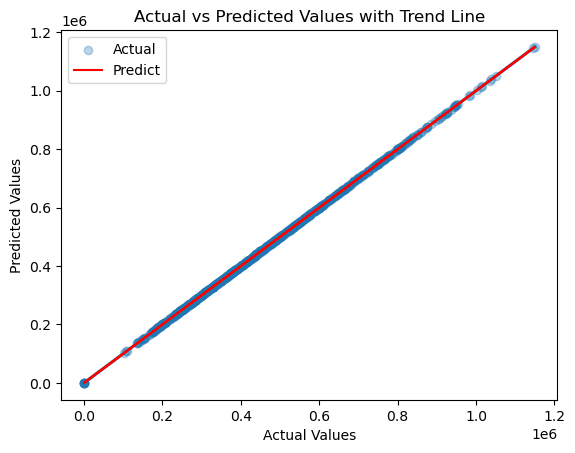

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting y_test and y_pred_rid are actual and predicted values
sns.regplot(x=y_test, y=y_pred_rid, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Trend Line')

trend_line = np.polyfit(y_test, y_pred_rid, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()


In [239]:
# #x(Independent variables) and y(target variables)
# x = data_without_outliers.iloc[:, :]
# y = data_without_outliers['price']


# #splitting the data into train, test data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =0)

# x_train.shape, x_test.shape, y_train.shape, y_test.shape


In [240]:
data_train = x_train[['price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot',
                    'sqft_above', 'sqft_basement', 'floors', 'condition', 'city_encoded']]
data_train.head


<bound method NDFrame.head of               price  bedrooms  bathrooms  yr_built  yr_renovated  sqft_living  \
491   372977.000000       3.0       2.50      2014             0       1690.0   
2203  395000.000000       3.0       1.00      1925          2002       1500.0   
1368  222400.000000       3.0       2.00      1995             0       1200.0   
3042  230000.000000       3.0       1.75      2014             0       1140.0   
3346  423050.925926       2.0       1.00      1923          1998        890.0   
...             ...       ...        ...       ...           ...          ...   
835   344500.000000       4.0       2.75      2002             0       1800.0   
3264  230000.000000       3.0       1.75      1957          2001       1400.0   
1653  800000.000000       3.0       2.25      1926          1993       1620.0   
2607  580000.000000       4.0       1.75      1975             0       1720.0   
2732  385000.000000       3.0       1.75      1968          1997       1300.0  

In [241]:
data_test = x_test[['price', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated','sqft_living', 'sqft_lot',
                      'sqft_above', 'sqft_basement', 'floors', 'condition', 'city_encoded']]
data_test.head


<bound method NDFrame.head of          price  bedrooms  bathrooms  yr_built  yr_renovated  sqft_living  \
1523  270000.0       4.0       2.25      1975             0       1900.0   
3044  438000.0       2.0       2.00      2000             0       1270.0   
3303       0.0       5.0       2.25      1986             0       2000.0   
2741  245000.0       3.0       2.75      1996             0       1300.0   
1255  629000.0       3.0       2.00      1920             0       1760.0   
...        ...       ...        ...       ...           ...          ...   
1939  632500.0       5.0       2.50      2003             0       2640.0   
1618  270000.0       4.0       2.75      1999             0       1990.0   
2888  481015.0       3.0       2.25      1987          2000       1550.0   
2102  507000.0       4.0       1.75      1968             0       1770.0   
2148  799000.0       4.0       2.50      2001             0       2590.0   

      sqft_lot  sqft_above  sqft_basement  floors  condit

<Axes: xlabel='yr_built', ylabel='sqft_living'>

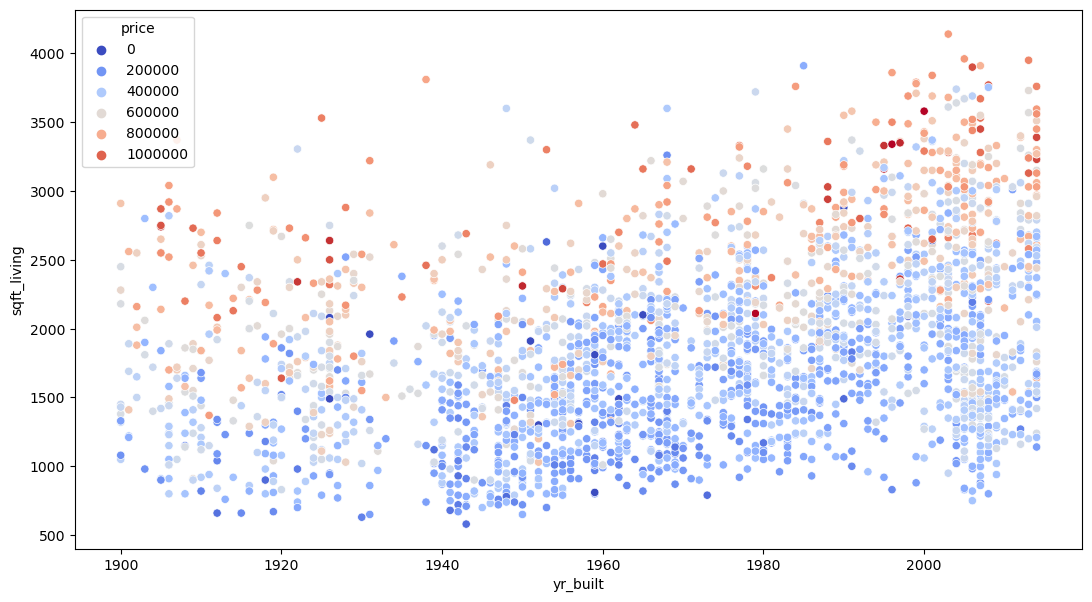

In [242]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='yr_built', y='sqft_living', data=data_train, hue='price', palette='coolwarm')


<Axes: xlabel='yr_built', ylabel='sqft_living'>

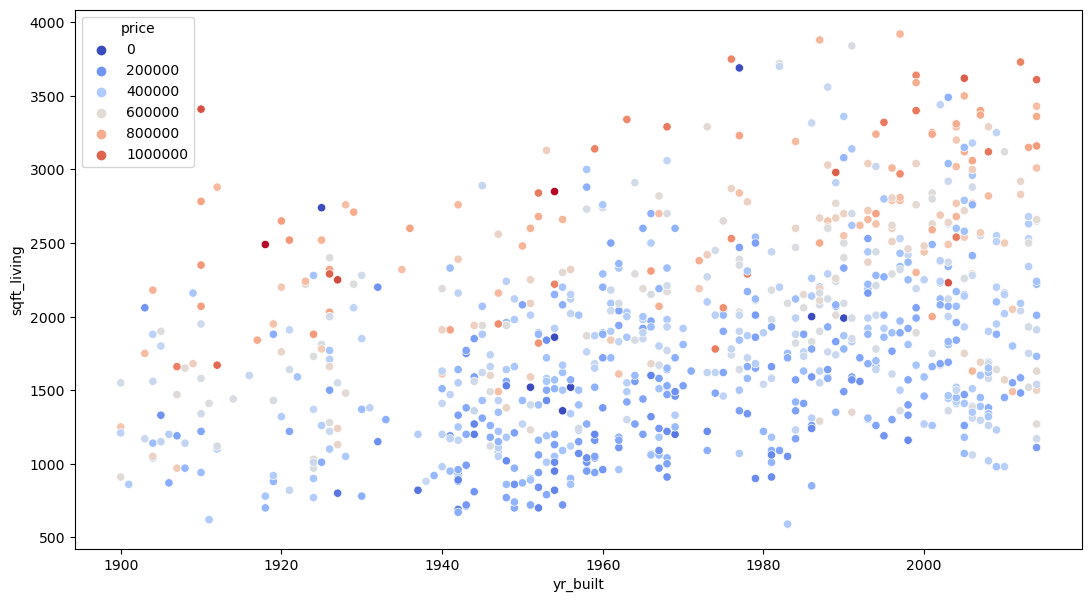

In [243]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='yr_built', y='sqft_living', data=data_test, hue='price', palette='coolwarm')


<Axes: xlabel='bathrooms', ylabel='sqft_living'>

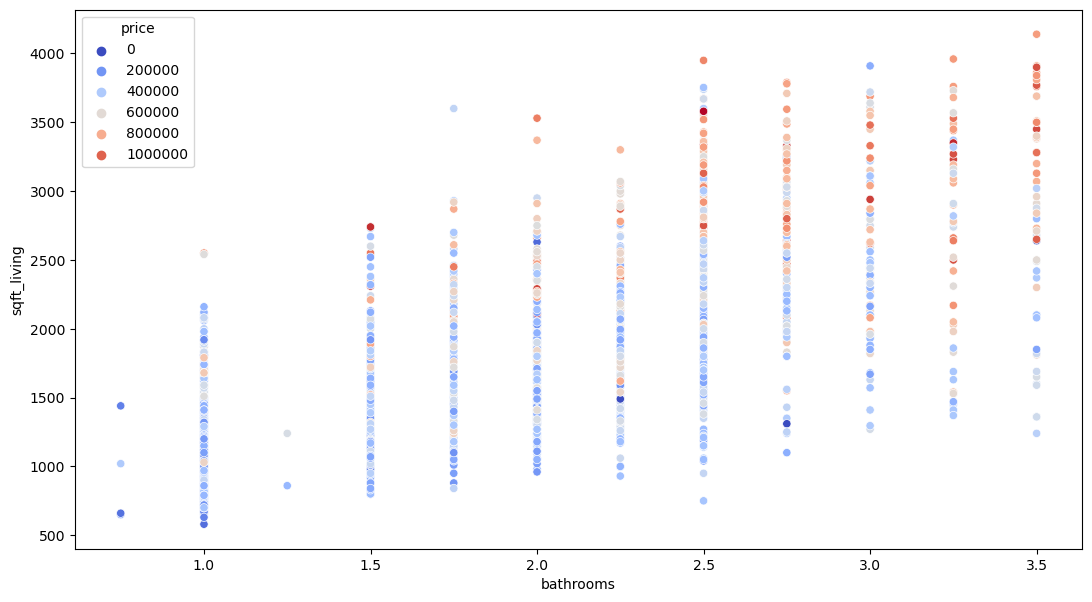

In [244]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='bathrooms', y='sqft_living', data=data_train, hue='price', palette='coolwarm')


<Axes: xlabel='bathrooms', ylabel='sqft_living'>

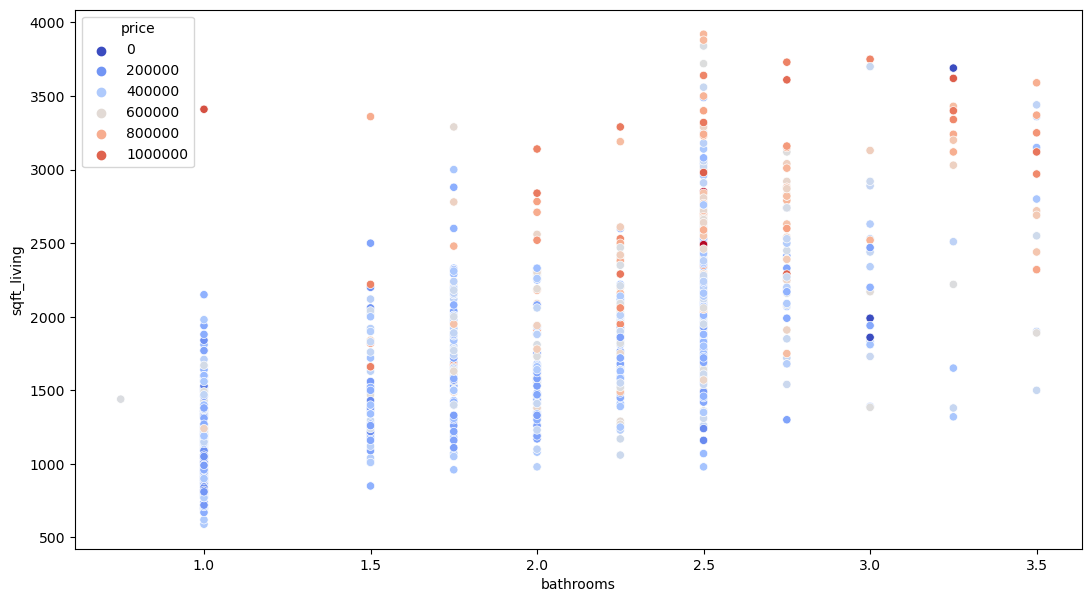

In [245]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='bathrooms', y='sqft_living', data=data_test, hue='price', palette='coolwarm')


<Axes: >

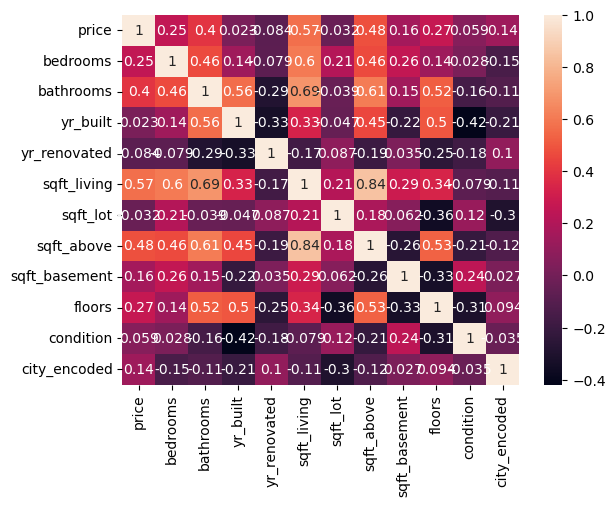

In [246]:
#After drop unnessary variable check the corrlation each attribute on the training data
sns.heatmap(data_train.corr(), annot=True)

<Axes: >

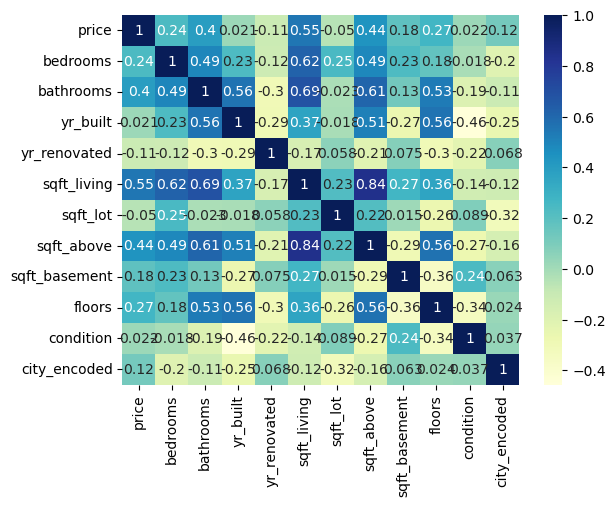

In [247]:
#The correlation of test data on the dataset
sns.heatmap(data_test.corr(), annot=True, cmap = 'YlGnBu')

In [248]:
# check the training dataset
train_data_np = data_train.to_numpy()
x_train, y_train = train_data_np[:, :], train_data_np[:,-1]
x_train.shape, y_train.shape

((2586, 12), (2586,))

In [314]:
# #using linear regression model check the mean absolute erros on the x_train dataset
# from sklearn.metrics import mean_absolute_error
# linear_model = LinearRegression().fit(x_train, y_train)
# linear_train_pred = linear_model.predict(x_train)
# mean_absolute_error(y_train, linear_train_pred)
# r2 = r2_score(y_train, linear_train_pred)
# r2

1.0

In [250]:
#Test Linear regression
# from sklearn.metrics import mean_absolute_error
# linear_model = LinearRegression().fit(x_train, y_train)
# linear_test_pred = linear_model.predict(x_test)
# mean_absolute_error(y_test, linear_test_pred)
# r2 = r2_score(y_test, linear_test_pred)
# r2

In [313]:
# #using linear regression model check the mean absolute erros on the x_test dataset
# linear_model = LinearRegression().fit(x_test, y_test)
# ln_test_pred = linear_model.predict(x_test)
# mean_absolute_error(y_test, ln_test_pred)




8.598802332535643e-11

In [252]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# # Dataset a trained Decision Tree model
# dt_model = DecisionTreeRegressor().fit(x_train, y_train)
# # Assuming you have already trained the model using x_train and y_train

# # Step 1: Make Predictions
# dt_train_pred = dt_model.predict(x_train)

# # Step 2: Calculate Mean Absolute Error
# mae_dt_train = mean_absolute_error(y_train, dt_train_pred)

# # Display the Mean Absolute Error for the Decision Tree model
# print("Mean Absolute Error for Decision Tree on Training Data:", mae_dt_train)

# r2 = r2_score(y_train, dt_train_pred)
# print('R-squared score:', r2)


Mean Absolute Error for Decision Tree on Training Data: 0.0
R-squared score: 1.0


In [291]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# #We trained data using Decision Tree model
# dt_model = DecisionTreeRegressor().fit(x_test, y_test)
# # Assuming you have already trained the model using x_train and y_train

# # We make predictions using decsion tree model
# dt_test_pred = dt_model.predict(x_test)

# # Calculate the Errors and R2 values performance
# MAE_dt_test = mean_absolute_error(y_test, dt_test_pred)
# Rmse_dt_test = float(np.sqrt(mean_squared_error(y_test, dt_test_pred))) #Root Mean Squared Error
# Mse_dt_test = mean_squared_error(y_test, dt_test_pred) #Mean Squared Error
# R2_dt_test = r2_score(y_test, dt_test_pred)

# #print the error and r2 with Decision Tree model
# print("Decision Tree Model with Training Data:")
# print("MAE_dt_test:",MAE_dt_test, "\nRmse_dt_test:", Rmse_dt_test, "\nMse_dt_test:",Mse_dt_test,
#                          "\nR2_dt_test:", R2_dt_test)


Decision Tree Model with Training Data:
MAE_dt_test: 0.0 
Rmse_dt_test: 0.0 
Mse_dt_test: 0.0 
R2_dt_test: 1.0


In [299]:

# Importing the RandomForestRegressor class from the scikit-learn ensemble module
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the RandomForestRegressor with specified parameters
# n_estimators: The number of trees in the forest
# max_depth: The maximum depth of the trees
randF = RandomForestRegressor(n_estimators=10, max_depth=5).fit(x_train, y_train)

# For the test data
randF1 = RandomForestRegressor(n_estimators=10, max_depth=5).fit(x_test, y_test)

# Making predictions on the training data using the trained model
rand_train_pred = randF.predict(x_train)

# Making predictions on the test data using the trained model
rand_test_pred = randF1.predict(x_test)

# Calculating the mean absolute error (MAE) between the predicted and actual values for the training set
train_mae = mean_absolute_error(rand_train_pred, y_train)

# Calculating the mean absolute error (MAE) between the predicted and actual values for the test set
test_mae = mean_absolute_error(rand_test_pred, y_test)

# Displaying the MAE for the training and test sets
train_mae, test_mae

(0.026471585856904418, 3284.9152722112563)

In [300]:
# # Validate the actual price of the test data and predicted price
# from sklearn.metrics import r2_score
# r2_score(y_test, ln_test_pred)

1.0

In [301]:
# from sklearn.metrics import r2_score
# r2_score( y_train, linear_train_pred)

1.0

In [ ]:
# Import necessary modules from statsmodels library
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

# Create an OLS regression model, specifying the dependent variable (y_train) and independent variables (x_train)
reg_model = smf.OLS(endog=y_train, exog=x_train).fit()

# Display a summary of the regression model, including statistics and coefficients
reg_model.summary()


In [293]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

randF = RandomForestRegressor(n_estimators=10, max_depth=5)

#The x_train and y_train are your training data
scores = cross_val_score(randF, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation Scores:", -scores)
print("Mean CV Score:", -scores.mean())


Cross-Validation Scores: [0.03213769 0.05197396 0.02744351 0.03838969 0.03027583]
Mean CV Score: 0.036044137007251405


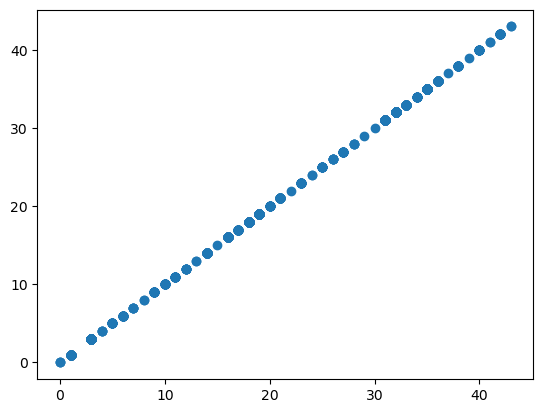

In [259]:
plt.scatter(y_train, linear_train_pred)

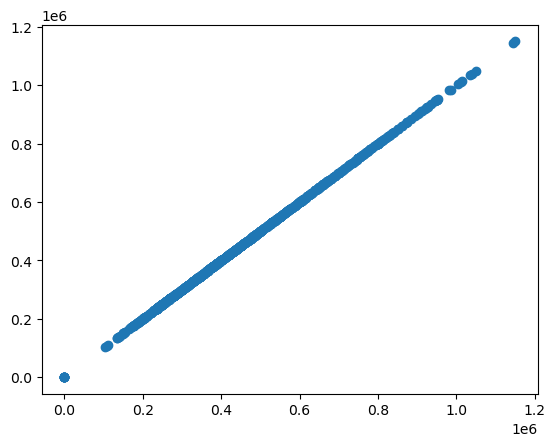

In [260]:
plt.scatter(y_test, ln_test_pred)

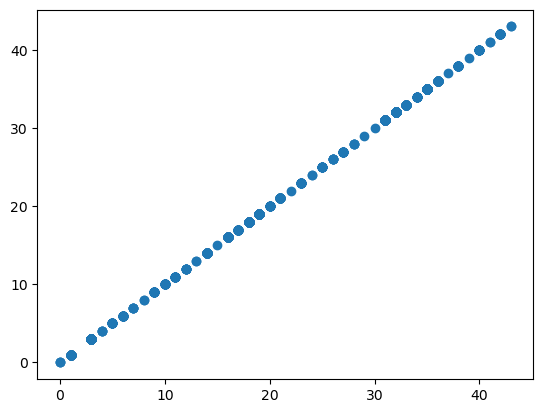

In [261]:
#using DecisionTreeRegression model train data
plt.scatter(y_train, dt_train_pred)

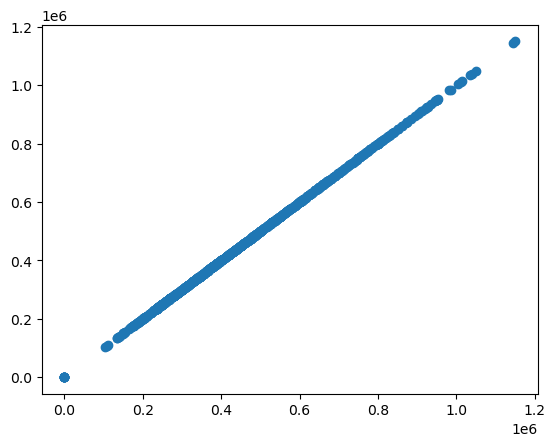

In [262]:
#using DecisionTreeRegression model test data 
plt.scatter(y_test, dt_test_pred)

In [263]:
dat = (data_test['price']==100000).sum()

In [302]:

# XGBoost stands for eXtreme Gradient Boosting, 
# and designed for efficient and effective implementation of gradient boosting algorithms.
# XGBoost is known for its ability to handle complex relationships in the data, handle missing values well, 
# and provide high predictive accuracy. 

import xgboost as xgb

# Create an instance of the XGBoost regressor
model_train = xgb.XGBRegressor(learning_rate=0.2, max_depth=10, n_estimators=1000)

# Fit the model to the training data
model_train.fit(x_train, y_train)

# Now we can make predictions
xgb_predict_train = model_train.predict(x_train)

# Evaluate the model's performance
value = model_train.score(x_train, xgb_predict_train)
print("Accuracy using eXtreme Gradient Boosting :", value)


Accuracy using eXtreme Gradient Boosting : 1.0


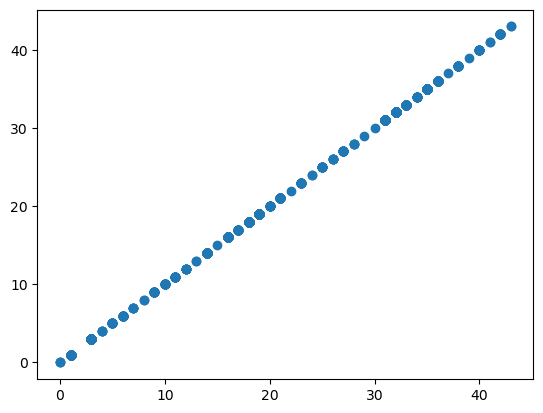

In [265]:
plt.scatter(y_train, xgb_predict_train)

In [329]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



#using Decision Tree model training data
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
# Assuming you have already trained the model using x_train and y_train

# We make predictions using decsion tree model
dt_train_pred = dt_model.predict(x_train)

# Calculate the Errors and R2 values performance
MAE_dt_train = mean_absolute_error(y_train, dt_train_pred)
Rmse_dt_train = float(np.sqrt(mean_squared_error(y_train, dt_train_pred))) #Root Mean Squared Error
Mse_dt_train = mean_squared_error(y_train, dt_train_pred) #Mean Squared Error
R2_dt_train = r2_score(y_train, dt_train_pred)

#print the error and r2 with Decision Tree model
print("Decision Tree Model Training Data:")
print("MAE_dt_train:",MAE_dt_train, "\nRmse_dt_train:", Rmse_dt_train, "\nMse_dt_train:",Mse_dt_train,
                         "\nR2_dt_train:", R2_dt_train)

# using RandomForest Regression model testing data
randF1 = RandomForestRegressor(n_estimators=10, max_depth=5).fit(x_train, y_train)

# Making predictions on the test data on randomforest regressor
randF_train_pred = randF1.predict(x_train)
MAE_rf_train = mean_absolute_error(y_train, randF_train_pred) # Calculating the mean absolute error
Rmse_rf_train = float(np.sqrt(mean_squared_error(y_train, randF_train_pred))) #Root Mean Squared Error
Mse_rf_train = mean_squared_error(y_train, randF_train_pred)
R2_rf_train = r2_score(y_train, randF_train_pred)

# Displaying the performance testing data and errors values
print("\nRandomForest Regression Model Training Data: ")
print("MAE_rf_train: ", MAE_rf_train, "\nRmse_rf_train: ", Rmse_rf_train, "\nMse_rf_train: ", Mse_rf_train
                     , "\nR2_rf_train: ", R2_rf_train)

# Using eXtreme Gradient Boosting(XGBoost) regressor
model_test = xgb.XGBRegressor(learning_rate=0.2, max_depth=10, n_estimators=1000)
# Fit the model to the training data
model_test.fit(x_test, y_test)
# Now we can make predictions
xgb_predict_test = model_test.predict(x_test)
# Evaluate the model's performance and errors check
value = model_test.score(x_test, xgb_predict_test)
MSE = mean_squared_error(y_test, xgb_predict_test)
Rmse_xgb_test = float(np.sqrt(mean_squared_error(y_test, xgb_predict_test))) #Root Mean Squared Error
Mse_xgb_test = mean_squared_error(y_test, xgb_predict_test)
R2 = r2_score(y_test, xgb_predict_test)
print("\nAccuracy of data using eXtreme Gradient Boosting Model Training: ", value, "\nMSE_XGB: ", MSE,
      '\nRmse_xgb_test: ', Rmse_xgb_test, "\nMse_xgb_test: ", Mse_xgb_test, "\nR2_XGB: ", R2)

Decision Tree Model Training Data:
MAE_dt_train: 0.0 
Rmse_dt_train: 0.0 
Mse_dt_train: 0.0 
R2_dt_train: 1.0

RandomForest Regression Model Training Data: 
MAE_rf_train:  0.027575940745338635 
Rmse_rf_train:  0.08034187437081002 
Mse_rf_train:  0.00645481677741502 
R2_rf_train:  0.9999522582750353

Accuracy of data using eXtreme Gradient Boosting Model Training:  1.0 
MSE_XGB:  0.0167312066149706 
Rmse_xgb_test:  0.12934916549777428 
Mse_xgb_test:  0.0167312066149706 
R2_XGB:  0.9999999999995796


In [288]:
# XGBoost stands for eXtreme Gradient Boosting, 
# and designed for efficient and effective implementation of gradient boosting algorithms.
# XGBoost is known for its ability to handle complex relationships in the data, handle missing values well, 
# and provide high predictive accuracy. 


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#using Decision Tree model test data
dt_model = DecisionTreeRegressor().fit(x_test, y_test)
# Assuming you have already trained the model using x_train and y_train

# We make predictions using decsion tree model
dt_test_pred = dt_model.predict(x_test)

# Calculate the Errors and R2 values performance
MAE_dt_test = mean_absolute_error(y_test, dt_test_pred)
Rmse_dt_test = float(np.sqrt(mean_squared_error(y_test, dt_test_pred))) #Root Mean Squared Error
Mse_dt_test = mean_squared_error(y_test, dt_test_pred) #Mean Squared Error
R2_dt_test = r2_score(y_test, dt_test_pred)

#print the error and r2 with Decision Tree model
print("Decision Tree Model Testing Data:")
print("MAE_dt_test:",MAE_dt_test, "\nRmse_dt_test:", Rmse_dt_test, "\nMse_dt_test:",Mse_dt_test,
                         "\nR2_dt_test:", R2_dt_test)

# using RandomForest Regression model testing data
randF1 = RandomForestRegressor(n_estimators=10, max_depth=5).fit(x_test, y_test)

# Making predictions on the test data on randomforest regressor
randF_test_pred = randF1.predict(x_test)
MAE_rf_test = mean_absolute_error(y_test, randF_test_pred) # Calculating the mean absolute error
Rmse_rf_test = float(np.sqrt(mean_squared_error(y_test, randF_test_pred))) #Root Mean Squared Error
Mse_rf_test = mean_squared_error(y_test, randF_test_pred)
R2_rf_test = r2_score(y_test, randF_test_pred)

# Displaying the performance testing data and errors values
print("\nRandomForest Regression Model Testing data: ")
print("MAE_rf_test: ", MAE_rf_test, "\nRmse_rf_test: ", Rmse_rf_test, "\nMse_rf_tes: ", Mse_rf_test
                     , "\nR2_rf_test: ", R2_rf_test)

# Using eXtreme Gradient Boosting(XGBoost) regressor
model_test = xgb.XGBRegressor(learning_rate=0.2, max_depth=10, n_estimators=1000)
# Fit the model to the training data
model_test.fit(x_test, y_test)
# Now we can make predictions
xgb_predict_test = model_test.predict(x_test)
# Evaluate the model's performance and errors check
value = model_test.score(x_test, xgb_predict_test)
MSE_test = mean_squared_error(y_test, xgb_predict_test)
Rmse_xgb_test = float(np.sqrt(mean_squared_error(y_test, xgb_predict_test))) #Root Mean Squared Error
Mse_xgb_test = mean_squared_error(y_test, xgb_predict_test)
R2 = r2_score(y_test, xgb_predict_test)
print("\nAccuracy data using eXtreme Gradient Boosting Model Testing: ", value, "\nMSE_XGB_test: ", MSE_test,'\nRmse_xgb_test: ', 
              Rmse_xgb_test, "\nMse_xgb_test: ", Mse_xgb_test, "\nR2_XGB_test: ", R2)


Decision Tree Model Testing Data:
MAE_dt_test: 0.0 
Rmse_dt_test: 0.0 
Mse_dt_test: 0.0 
R2_dt_test: 1.0

RandomForest Regression Model Testing data: 
MAE_rf_test:  3153.8275615863645 
Rmse_rf_test:  5632.086542710321 
Mse_rf_tes:  31720398.824578695 
R2_rf_test:  0.9992028114171578

Accuracy data using eXtreme Gradient Boosting Model Testing:  1.0 
MSE_XGB_test:  0.0167312066149706 
Rmse_xgb_test:  0.12934916549777428 
Mse_xgb_test:  0.0167312066149706 
R2_XGB_test:  0.9999999999995796


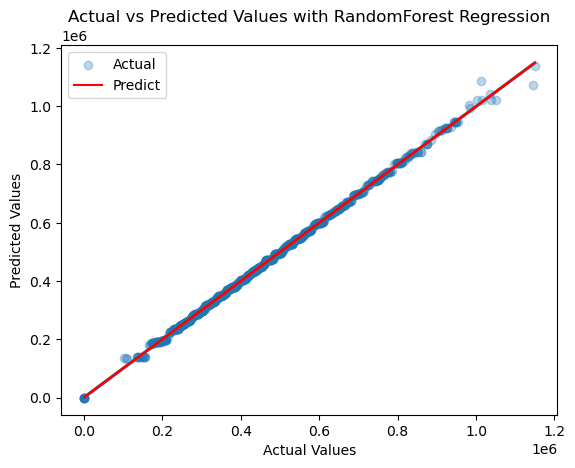

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting y_test and random forest  are actual and predicted values
sns.regplot(x=y_test, y=randF_test_pred, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with RandomForest Regression')

trend_line = np.polyfit(y_test, randF_test_pred, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()


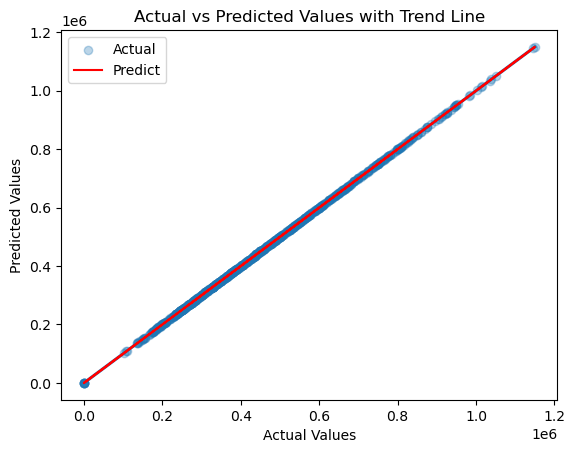

In [305]:

import seaborn as sns
import matplotlib.pyplot as plt

#Decsion tree model plot
#Plotting y_test and dt_test_pred are actual and predicted values
sns.regplot(x=y_test, y=dt_test_pred, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Trend Line')

trend_line = np.polyfit(y_test, dt_test_pred, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()


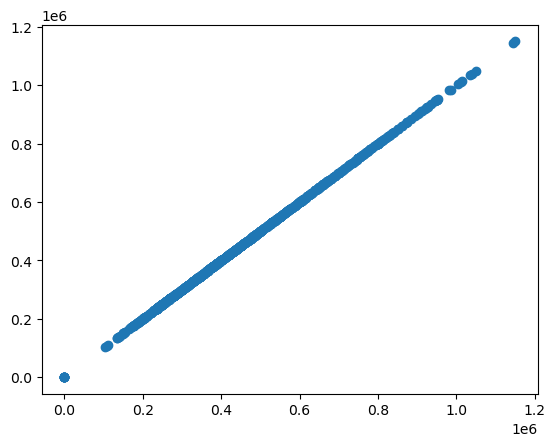

In [306]:
plt.scatter(y_test, dt_test_pred)

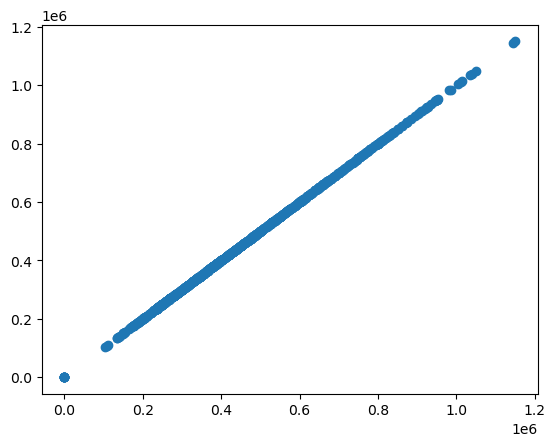

In [307]:
plt.scatter(y_test, xgb_predict_test)

In [308]:
# train data predict with extreme Gradient Boosting
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from math import sqrt

# # Define Variables
# Num_feat = x_train.shape[1] # Number of features in the test set
# Num_data = len(x_train)    # Number of samples in the test set

# # Rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict_test)),'.3f'))
# Rmse = float(np.sqrt(mean_squared_error(y_train, y_predict_train)))
# Mse = mean_squared_error(y_train, y_predict_train)
# Mae = mean_absolute_error(y_train, y_predict_train)
# R2 = r2_score(y_train, y_predict_train)

# Setting_r2 = 1 - (1 - R2) * (Num_data - 1) / (Num_data - Num_feat - 1)

# print('train_RMSE =',Rmse, '\ntrain_MSE =',Mse, '\ntrain_MAE =',Mae, '\n_train_R2 =', R2, '\nAdjusted R2 =', Setting_r2) 

In [312]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

Rmse = float(np.sqrt(mean_squared_error(y_train, xgb_predict_train)))
Mse = mean_squared_error(y_train, xgb_predict_train)
Mae = mean_absolute_error(y_train, xgb_predict_train)
R2 = r2_score(y_train, xgb_predict_train)

print('train_RMSE =',Rmse, '\ntrain_MSE =',Mse, '\ntrain_MAE =',Mae, '\ntrain_R2 =', R2) 

train_RMSE = 0.00016958634596978128 
train_MSE = 2.875952873938235e-08 
train_MAE = 4.568225300776479e-05 
train_R2 = 0.999999999787286


In [315]:
# Import necessary metrics from scikit-learn and python libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate regression performance metrics for the training set
Rmse = float(np.sqrt(mean_squared_error(y_train, y_predict_train))) # Root Mean Squared Error
Mse = mean_squared_error(y_train, y_predict_train)  # Mean Squared Error
Mae = mean_absolute_error(y_train, y_predict_train)  # Mean Absolute Error
R2 = r2_score(y_train, y_predict_train)  # R-squared

# Dispaly the calculated metrics for the training set
print('train_RMSE =', Rmse, '\ntrain_MSE =', Mse, '\ntrain_MAE =', Mae, '\ntrain_R2 =', R2)


NameError: name 'y_predict_train' is not defined

In [317]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Define Variables
Num_feat = x_test.shape[1] # Number of features in the test set
Num_data = len(x_test)    # Number of samples in the test set

# Rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict_test)),'.3f'))
Rmse = float(np.sqrt(mean_squared_error(y_test,xgb_predict_test)))
Mse = mean_squared_error(y_test, xgb_predict_test)
Mae = mean_absolute_error(y_test, xgb_predict_test)
R2 = r2_score(y_test, xgb_predict_test)

Setting_r2 = 1 - (1 - R2) * (Num_data - 1) / (Num_data - Num_feat - 1)

print('test_RMSE =',Rmse, '\ntest_MSE =',Mse, '\ntest_MAE =',Mae, '\ntest_R2 =', R2, '\nAdjusted R2 =', Setting_r2) 

test_RMSE = 0.12934916549777428 
test_MSE = 0.0167312066149706 
test_MAE = 0.08985543841195415 
test_R2 = 0.9999999999995796 
Adjusted R2 = 0.9999999999995736


In [318]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate regression performance metrics for the testing set
Rmse = float(np.sqrt(mean_squared_error(y_test, y_predict_test))) #Root Mean Squared Error
Mse = mean_squared_error(y_test, y_predict_test) #Mean Squared Error
Mae = mean_absolute_error(y_test, y_predict_test) #Mean Absolute Error
R2 = r2_score(y_test, y_predict_test)
# Dispaly the calculated metrics for the testing set
print('test_RMSE =',Rmse, '\ntest_MSE =',Mse, '\ntest_MAE =',Mae, '\ntest_R2 =', R2) 

NameError: name 'y_predict_test' is not defined

In [319]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predict_train, alpha=0.5, label='Actual')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear trend line (polynomial of degree 1)
trend_line = np.polyfit(y_train, y_predict_train, 1)
plt.plot(y_train, np.polyval(trend_line, y_train), color='red', label='Predict')

plt.legend()
plt.show()


NameError: name 'y_predict_train' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# The y_predict_test is the predicted values from your model

# Using Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_test, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# y_predict_test is the predicted values from testing model

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_test, alpha=0.3, label='Actual')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear trend line (polynomial of degree 1)
trend_line = np.polyfit(y_test, y_predict_test, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()


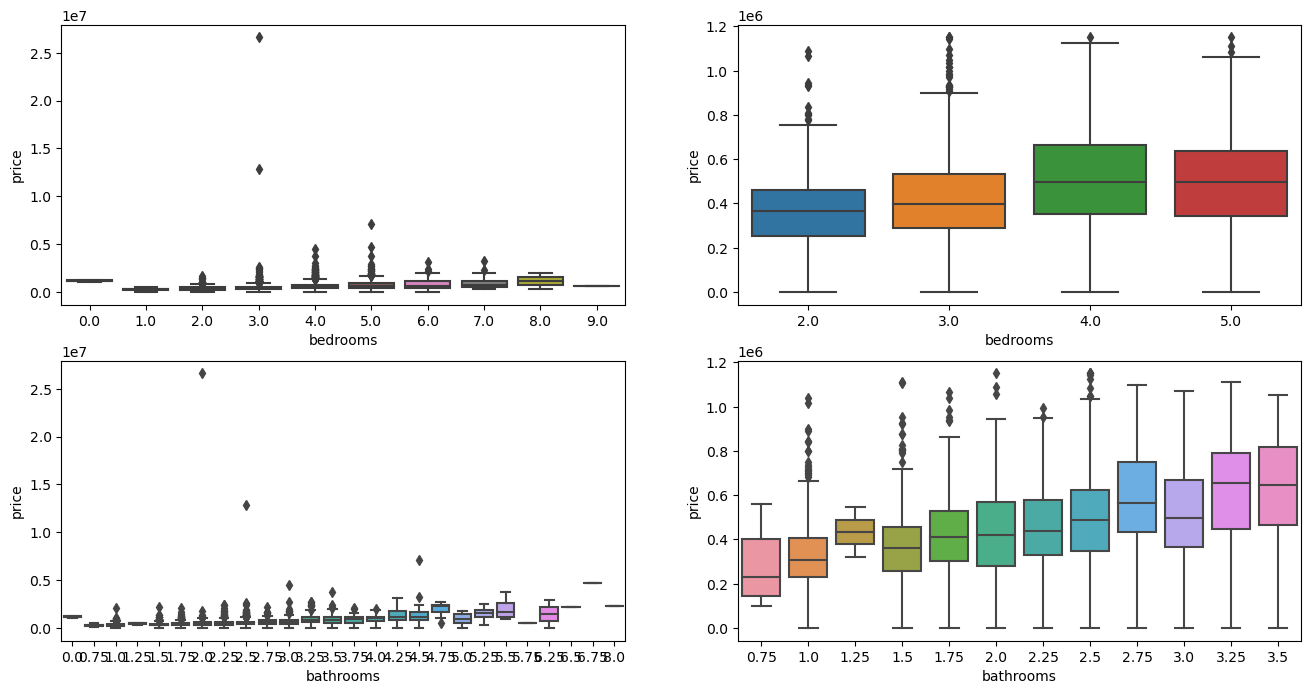

In [320]:
#Compare bedrooms and bathrooms with outlier and without outliers on the dataset
_, ax = plt.subplots(2, 2, figsize=(16, 8))
sns.boxplot(x='bedrooms', y='price', data=KcData, ax=ax[0][0])
sns.boxplot(x='bedrooms', y='price', data=data_without_outliers, ax=ax[0][1])
sns.boxplot(x='bathrooms', y='price', data=KcData, ax=ax[1][0])
sns.boxplot(x='bathrooms', y='price', data=data_without_outliers, ax=ax[1][1])
plt.show()

In [ ]:
# from sklearn.feature_selection import mutual_info_regression

# def get_mi_score(x, y):
#     mi = mutual_info_regression(x, y, random_state=10)
#     mi = pd.Series(mi, index=x.columns).sort_values(ascending=False)
#     return mi
# mi_score = get_mi_score(x, y)
# mi_score


In [ ]:
# plt.figure(figsize=(12, 5))
# ax = sns.barplot(y=mi_score.index[1:], x=mi_score[1:])
# ax.set_title('MI scores', fontdict={'fontsize': 16})
# plt.show()

In [ ]:
#comapre before and after data cleaned on variables floors and condition with tagret variable 
_, ax = plt.subplots(2, 2, figsize=(16, 8))
sns.boxplot(x='condition', y='price', data=KcData, ax=ax[0][0])
sns.boxplot(x='condition', y='price', data=data_without_outliers, ax=ax[0][1])
sns.boxplot(x='floors', y='price', data=KcData, ax=ax[1][0])
sns.boxplot(x='floors', y='price', data=data_without_outliers, ax=ax[1][1])
plt.show()

In [ ]:
sns.distplot(KcData["price"], fit=norm)

In [335]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a synthetic dataset
#X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the dataset
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = Ridge(alpha=10)  # alpha=0 corresponds to no regularization
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_train)
mse_linear = mean_squared_error(y_train, y_pred_linear)
R2_linear = r2_score(y_train, y_pred_linear)

# L1 Regularization (Lasso)
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_train)
mse_lasso = mean_squared_error(y_train, y_pred_lasso)
R2_lasso = r2_score(y_train, y_pred_lasso)

# L2 Regularization (Ridge)
ridge_reg = Ridge(alpha=1)  # alpha is the regularization parameter
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_train)
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)

print("mse_linear: ", mse_linear, '\nR2_linear:', R2_linear, 
      "\nmse_lasso:", mse_lasso,'\nR2_lasso:', R2_lasso, 
      "\nmse_ridge:",mse_ridge , "\nR2_ridge: ", r2_ridge,  )

mse_linear:  1.3633434429810018e-07 
R2_linear: 0.9999999989916311 
mse_lasso: 8.550612269406364e-05 
R2_lasso: 0.9999993675715465 
mse_ridge: 1.365142325912086e-09 
R2_ridge:  0.999999999989903


In [336]:
# Linear Regression
linear_reg_train = Ridge(alpha=0)  # alpha=0 corresponds to no regularization
linear_reg_train.fit(x_train, y_train)
y_pred_linear_train = linear_reg_train.predict(x_train)
Mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
Rmse_linear_train = float(np.sqrt(mean_squared_error(y_train, y_pred_linear_train))) #Root Mean Squared Errors
Mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
R2_linear_train = r2_score(y_train, y_pred_linear_train)
print("Linear Regression Model Traning Data:")
print("Mse_linear_train: ", Mse_linear_train, "\nRmse_linear_train: ", Rmse_linear_train,
     "\nMae_linear_train: ",Mae_linear_train, "\nR2_linear_train: ", R2_linear_train)

# L1 Regularization (Lasso)
lasso_reg_train = Lasso(alpha=1000.0)  # alpha is the regularization parameter 
lasso_reg_train.fit(x_train, y_train)
y_pred_lasso_train = lasso_reg_train.predict(x_train)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
Rmse_lasso_train = float(np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))) #Root Mean Squared Errors
Mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
R2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print("\nL1 Regularization Lasso Model in Traning Data: ")
print("mse_lasso_train:", mse_lasso_train, "\nRmse_lasso_train: ", Rmse_lasso_train,
      "\nMae_lasso_train: ", Mae_lasso_train, "\nR2_lasso_train:", R2_lasso_train) 

# L2 Regularization (Ridge)
ridge_reg_train = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg_train.fit(x_train, y_train)
y_pred_ridge_train = ridge_reg.predict(x_train)
Mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)  #Mean Squared Errors
Rmse_ridge_train = float(np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))) #Root Mean Squared Errors
Mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train) #Mean Absolute Errors
R2_ridge_train = r2_score(y_train, y_pred_ridge_train)

#Dispay data traning performance and check errors
print("\nL2 Regularization (Ridge) Rergression Model")
print("Mse_ridge_train: ", Mse_ridge_train, "\nRmse_ridge_train: ", Rmse_ridge_train, 
      "\nMae_ridge_train: ", Mae_ridge_train, "\nR2_ridge_train: ", R2_ridge_train)

Linear Regression Model Traning Data:
Mse_linear_train:  1.0466773039385674e-27 
Rmse_linear_train:  3.235239255354335e-14 
Mae_linear_train:  2.527659630199351e-14 
R2_linear_train:  1.0

L1 Regularization Lasso Model in Traning Data: 
mse_lasso_train: 119.40549808687905 
Rmse_lasso_train:  10.927282282748948 
Mae_lasso_train:  9.188482159196978 
R2_lasso_train: 0.11684178722498473

L2 Regularization (Ridge) Rergression Model
Mse_ridge_train:  1.365142325912086e-09 
Rmse_ridge_train:  3.694783249274693e-05 
Mae_ridge_train:  2.972553928249688e-05 
R2_ridge_train:  0.999999999989903


/Users/mesfinegebresenbet/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.75639e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [328]:
# Linear Regression Testing on the dataset
linear_reg_test = Ridge(alpha=0)  # alpha=0 corresponds to no regularization
linear_reg_test.fit(x_test, y_test)
y_pred_linear_test = linear_reg_test.predict(x_test)
Mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
Rmse_linear_test = float(np.sqrt(mean_squared_error(y_test, y_pred_linear_test))) #Root Mean Squared Errors
Mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
R2_linear_test = r2_score(y_test, y_pred_linear_test)
print("Linear Regression Model Testing Data:")
print("Mse_linear_test: ", Mse_linear_test, "\nRmse_linear_test: ", Rmse_linear_test,
     "\nMae_linear_test: ",Mae_linear_test, "\nR2_linear_test: ", R2_linear_test)

# L1 Regularization (Lasso) Testing on the dataset
lasso_reg_test = Lasso(alpha=1000.0)  # alpha is the regularization parameter
lasso_reg_test.fit(x_test, y_test)
y_pred_lasso_test = lasso_reg_test.predict(x_test)
Mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
Rmse_lasso_test = float(np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))) #Root Mean Squared Errors
Mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
R2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print("\nL1 Regularization Lasso Model in Testing Data: ")
print("Mse_lasso_test:", Mse_lasso_test, "\nRmse_lasso_test: ", Rmse_lasso_test,
      "\nMae_lasso_test: ", Mae_lasso_test, "\nR2_lasso_test:", R2_lasso_test) 

# L2 Regularization (Ridge) Testing on the dataset
ridge_reg_test = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg_test.fit(x_test, y_test)
y_pred_ridge_test = ridge_reg_test.predict(x_test)
Mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)  #Mean Squared Errors
Rmse_ridge_test = float(np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))) #Root Mean Squared Errors
Mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test) #Mean Absolute Errors
R2_ridge_test = r2_score(y_test, y_pred_ridge_test)

#Dispay data traning performance and check errors
print("\nL2 Regularization (Ridge)")
print("Mse_ridge_test: ", Mse_ridge_test, "\nRmse_ridge_test: ", Rmse_ridge_test, 
      "\nMae_ridge_test: ", Mae_ridge_test, "\nR2_ridge_test: ", R2_ridge_test)

Linear Regression Model Testing Data:
Mse_linear_test:  3.8233305067908814e-21 
Rmse_linear_test:  6.183308585855053e-11 
Mae_linear_test:  4.286063045252044e-11 
R2_linear_test:  1.0

L1 Regularization Lasso Model in Testing Data: 
Mse_lasso_test: 2.5131732523709036e-05 
Rmse_lasso_test:  0.005013155944483379 
Mae_lasso_test:  0.004011181658426254 
R2_lasso_test: 0.9999999999999993

L2 Regularization (Ridge)
Mse_ridge_test:  5.720123412755617e-17 
Rmse_ridge_test:  7.563149749116183e-09 
Mae_ridge_test:  5.7827094947099215e-09 
R2_ridge_test:  1.0


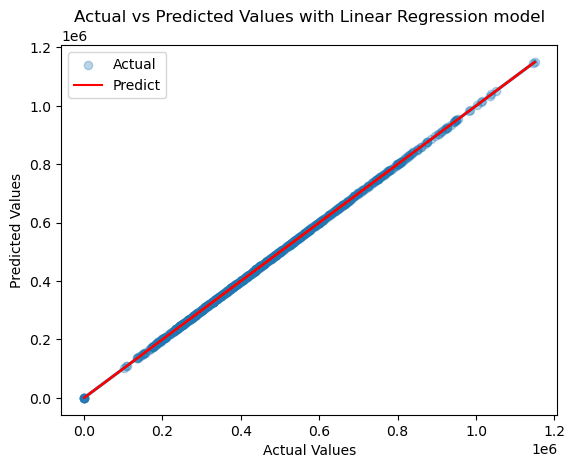

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

#Linear regression model test plot
#Plotting y_test and y_pred_rid are actual and predicted values
sns.regplot(x=y_test, y=y_pred_linear_test, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Linear Regression model')

trend_line = np.polyfit(y_test, y_pred_linear_test, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()

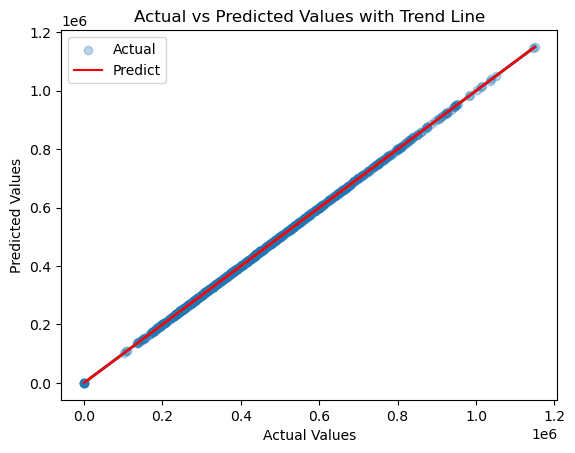

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

#Lasso regression model test plot
#Plotting y_test and y_pred_rid are actual and predicted values
sns.regplot(x=y_test, y=y_pred_lasso_test, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Trend Line')

trend_line = np.polyfit(y_test, y_pred_lasso_test, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()

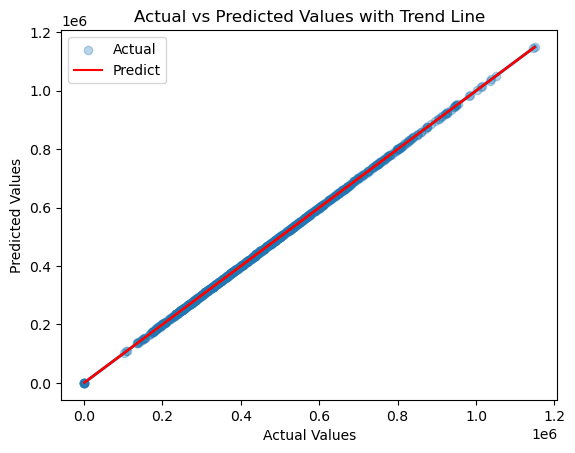

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

#Lasso regression model test plot
#Plotting y_test and y_pred_rid are actual and predicted values
sns.regplot(x=y_test, y=y_pred_ridge_test, scatter_kws={'alpha':0.3}, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Trend Line')

trend_line = np.polyfit(y_test, y_pred_ridge_test, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', label='Predict')

plt.legend()
plt.show()